# Loading dependencies & datasets

In [89]:
import matplotlib.pyplot as plt
#Data Structures
import pandas as pd
import numpy as np
import re
import os

#Others
import warnings
warnings.filterwarnings('ignore')

In [90]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

# Understand the columns of data

In [103]:
pd.set_option('display.max_columns', None)
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

### Check the object data

In [104]:
# Selecting columns with data type 'object'
object_columns = data.select_dtypes(include=['object']).columns

data[object_columns].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           6/22/2014           7/10/2014           8/24/2014   
1           6/12/2014           7/10/2014           8/26/2014   
2           6/11/2014           7/22/2014           8/24/2014   
3           6/15/2014           7/21/2014           8/25/2014   
4           6/25/2014           7/26/2014           8/30/2014   

  date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                      NaN                      NaN                      NaN  
1                      NaN                 7/8/2014                      NaN  
2                      NaN                      NaN                      NaN  
3                      NaN                      NaN                      NaN  
4                6/25/2014                7/23/2014                8/20/2014

In [105]:
pd.set_option('display.max_rows', None) 

# Calculate the number of missing values in each column
missing_values = data.isnull().sum()

# Filter out columns that have no missing values
missing_values = missing_values[missing_values > 0]

missing_values

loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_7          399
last_date_of_month_8          733
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou_6             2768
loc_og_t2f_mou_7             2687
loc_og_t2f_mou_8             3703
loc_og_t2c_mou_6             2768
loc_og_t2c_mou_7             2687
loc_og_t2c_mou_8             3703
loc_og_mou_6  

Base on the data_dict description, we can eliminated ID columns that would not affact for churn and drop the cols which have missing values that over 50000.

In [106]:
# Filter columns where the number of missing values is greater than 50,000
cols_to_drop = missing_values[missing_values > 50000].index

# Drop these columns from the DataFrame
data.drop(cols_to_drop, axis=1, inplace=True)

In [107]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 142 columns):
 #    Column                Dtype  
---   ------                -----  
 0    id                    int64  
 1    circle_id             int64  
 2    loc_og_t2o_mou        float64
 3    std_og_t2o_mou        float64
 4    loc_ic_t2o_mou        float64
 5    last_date_of_month_6  object 
 6    last_date_of_month_7  object 
 7    last_date_of_month_8  object 
 8    arpu_6                float64
 9    arpu_7                float64
 10   arpu_8                float64
 11   onnet_mou_6           float64
 12   onnet_mou_7           float64
 13   onnet_mou_8           float64
 14   offnet_mou_6          float64
 15   offnet_mou_7          float64
 16   offnet_mou_8          float64
 17   roam_ic_mou_6         float64
 18   roam_ic_mou_7         float64
 19   roam_ic_mou_8         float64
 20   roam_og_mou_6         float64
 21   roam_og_mou_7         float64
 22   roam_og_mou_8       

we will explore the feature by categorical with heatmap to better understand the churn 

## Analysing The Feature by group

In [108]:
import re


# 1. Call Usage Details
local_calls = [col for col in data.columns if re.search(r'loc_.*mou', col)]
std_calls = [col for col in data.columns if re.search(r'std_.*mou', col)]
roaming_calls = [col for col in data.columns if re.search(r'roam_.*mou', col)]
isd_calls = [col for col in data.columns if re.search(r'isd_og_mou', col)]
spl_calls = [col for col in data.columns if re.search(r'spl_og_mou', col)]

# 2. Data Usage
data_usage = [col for col in data.columns if re.search(r'vol_(2g|3g)_mb', col)]

# 3. Subscription and Recharge Details
recharge_details = [col for col in data.columns if re.search(r'total_rech_(num|amt)|max_rech_amt', col)]
packs = [col for col in data.columns if re.search(r'(monthly|sachet)_(2g|3g)', col)]

# 4. Financial Metrics
arpu = [col for col in data.columns if re.search(r'arpu_', col)]

# 5. Customer Tenure
customer_tenure = [col for col in data.columns if re.search(r'^aon$', col)]

# 6. Additional Metrics
vbc = [col for col in data.columns if re.search(r'vbc_3g', col)]

# 7. Date Information
date_info = [col for col in data.columns if re.search(r'date_of_last_rech', col)]

# 8. Target Variable
churn_probability = [col for col in data.columns if re.search(r'churn_probability', col)]

In [109]:
churn_probability[local_calls].describe()

loc_og_t2o_mou  loc_ic_t2o_mou  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count         69297.0         69297.0      67231.000000      67312.000000   
mean              0.0             0.0         46.904854         46.166503   
std               0.0             0.0        150.971758        154.739002   
min               0.0             0.0          0.000000          0.000000   
25%               0.0             0.0          1.660000          1.650000   
50%               0.0             0.0         11.910000         11.580000   
75%               0.0             0.0         40.740000         39.760000   
max               0.0             0.0       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696.830000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      67231.000000      67312.000000      66296.000000      67231.000000   
mean           3.743179          3.777031          3.661652          1.126025   
std           13.319542         13.568110         13.009193          5.741811   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            2.060000          2.080000          2.030000          0.000000   
max          617.580000        815.330000        588.290000        342.860000   

       loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
count      67312.000000      66296.000000  67231.000000  67312.000000   
mean           1.361052          1.420840    143.893585    140.750120   
std            7.914113          6.542202    252.034597    246.313148   
min            0.000000          0.000000      0.000000      0.000000   
25%            0.000000          0.000000     17.235000     17.590000   
50%            0.000000          0.000000     65.190000     63.430000   
75%            0.000000          0.000000    167.880000    163.932500   
max          916.240000        351.830000  10643.380000   7674.780000   

       loc_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
count  66296.000000      67231.000000      67312.000000      66296.000000   
mean     140.476486         48.043255         47.882736         47.256388   
std      245.342359        140.499757        147.761124        141.249368   
min        0.000000          0.000000          0.000000          0.000000   
25%       17.237500          3.030000          3.260000          3.280000   
50%       63.520000         15.740000         15.830000         16.040000   
75%      165.615000         46.980000         45.690000         46.280000   
max    11039.910000       5315.590000       9324.660000      10696.230000   

       loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
count      67231.000000      67312.000000      66296.000000      67231.000000   
mean         107.152439        106.489856        108.154731         12.050672   
std          168.455999        165.452459        166.223461         39.416076   
min            0.000000          0.000000          0.000000          0.000000   
25%           17.390000         18.610000         18.940000          0.000000   
50%           5

In [135]:
# Check the data is balanced or not
data[churn_probability].value_counts()

churn_probability
0                    62867
1                     7132
dtype: int64

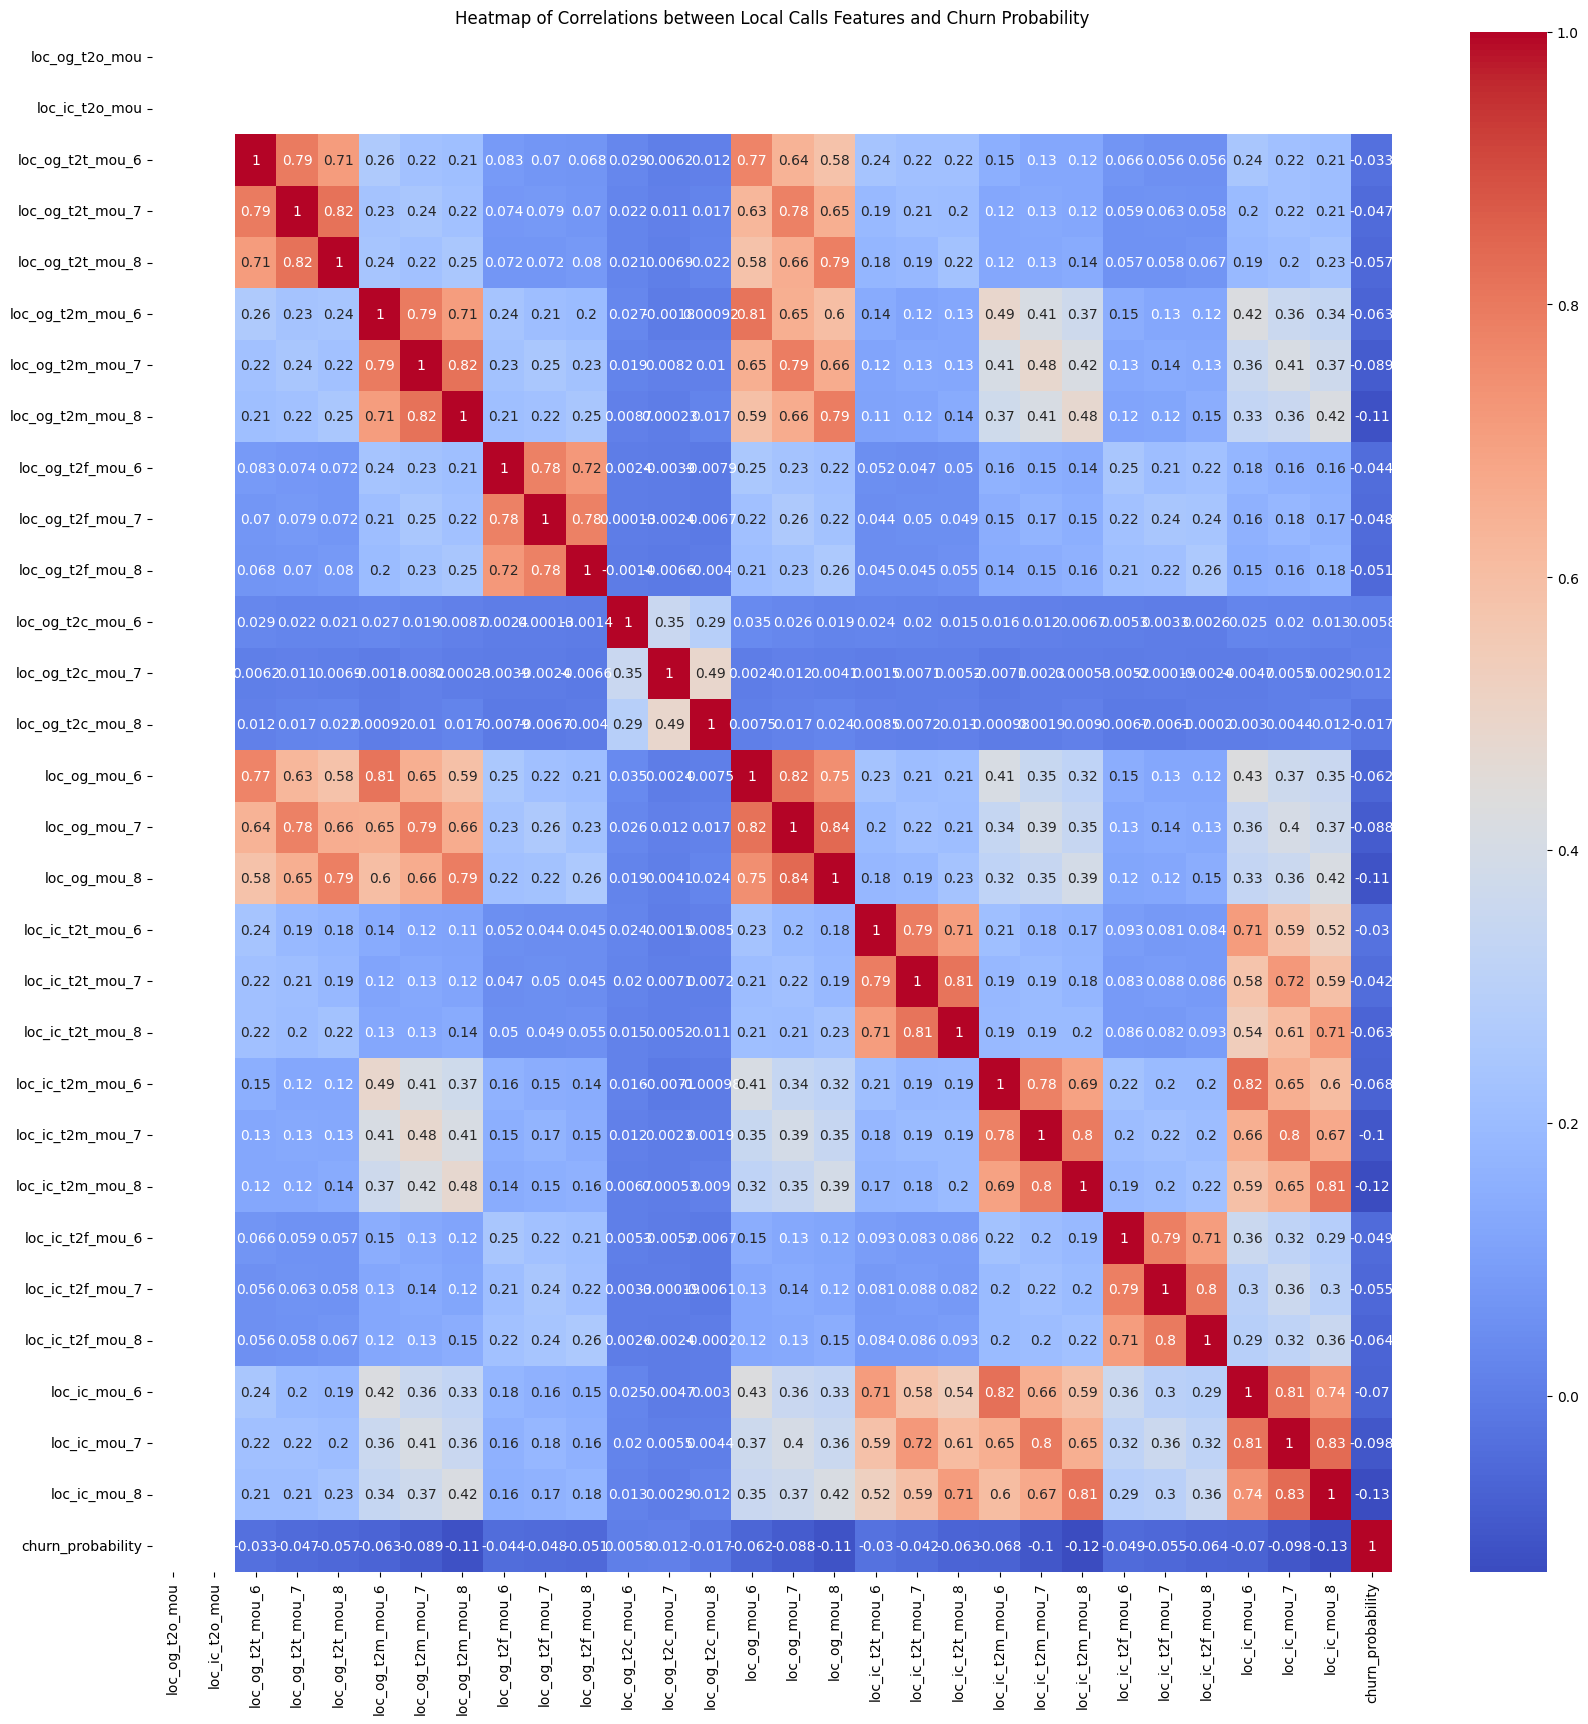

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the features from local_calls plus the churn_probability
selected_columns = local_calls + ['churn_probability']
correlation_data = data[selected_columns].corr()

# Creating a heatmap
plt.figure(figsize=(20, 20))  # Adjust the size as needed
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations between Local Calls Features and Churn Probability')
plt.show()

### Base on the heatmap we find that there have unique values in columns, preprocess the data to drop those cols that useless in prediction

In [111]:
# Iterate over each column and drop columns with only one unique value
cols_to_drop = [col for col in data.columns if data[col].nunique() <= 1]

# Drop the identified columns
data.drop(cols_to_drop, axis=1, inplace=True)

In [112]:
# 1. Call Usage Details
local_calls = [col for col in data.columns if re.search(r'loc_.*mou', col)]
std_calls = [col for col in data.columns if re.search(r'std_.*mou', col)]
roaming_calls = [col for col in data.columns if re.search(r'roam_.*mou', col)]
isd_calls = [col for col in data.columns if re.search(r'isd_og_mou', col)]
spl_calls = [col for col in data.columns if re.search(r'spl_og_mou', col)]

# 2. Data Usage
data_usage = [col for col in data.columns if re.search(r'vol_(2g|3g)_mb', col)]

# 3. Subscription and Recharge Details
recharge_details = [col for col in data.columns if re.search(r'total_rech_(num|amt)|max_rech_amt', col)]
packs = [col for col in data.columns if re.search(r'(monthly|sachet)_(2g|3g)', col)]

# 4. Revenue Metrics
arpu = [col for col in data.columns if re.search(r'arpu_', col)]

# 5. Customer Tenure
customer_tenure = [col for col in data.columns if re.search(r'^aon$', col)]

# 6. Additional Metrics
vbc = [col for col in data.columns if re.search(r'vbc_3g', col)]

# 7. Date Information
date_info = [col for col in data.columns if re.search(r'date_of_last_rech', col)]

# 8. Target Variable
churn_probability = [col for col in data.columns if re.search(r'churn_probability', col)]

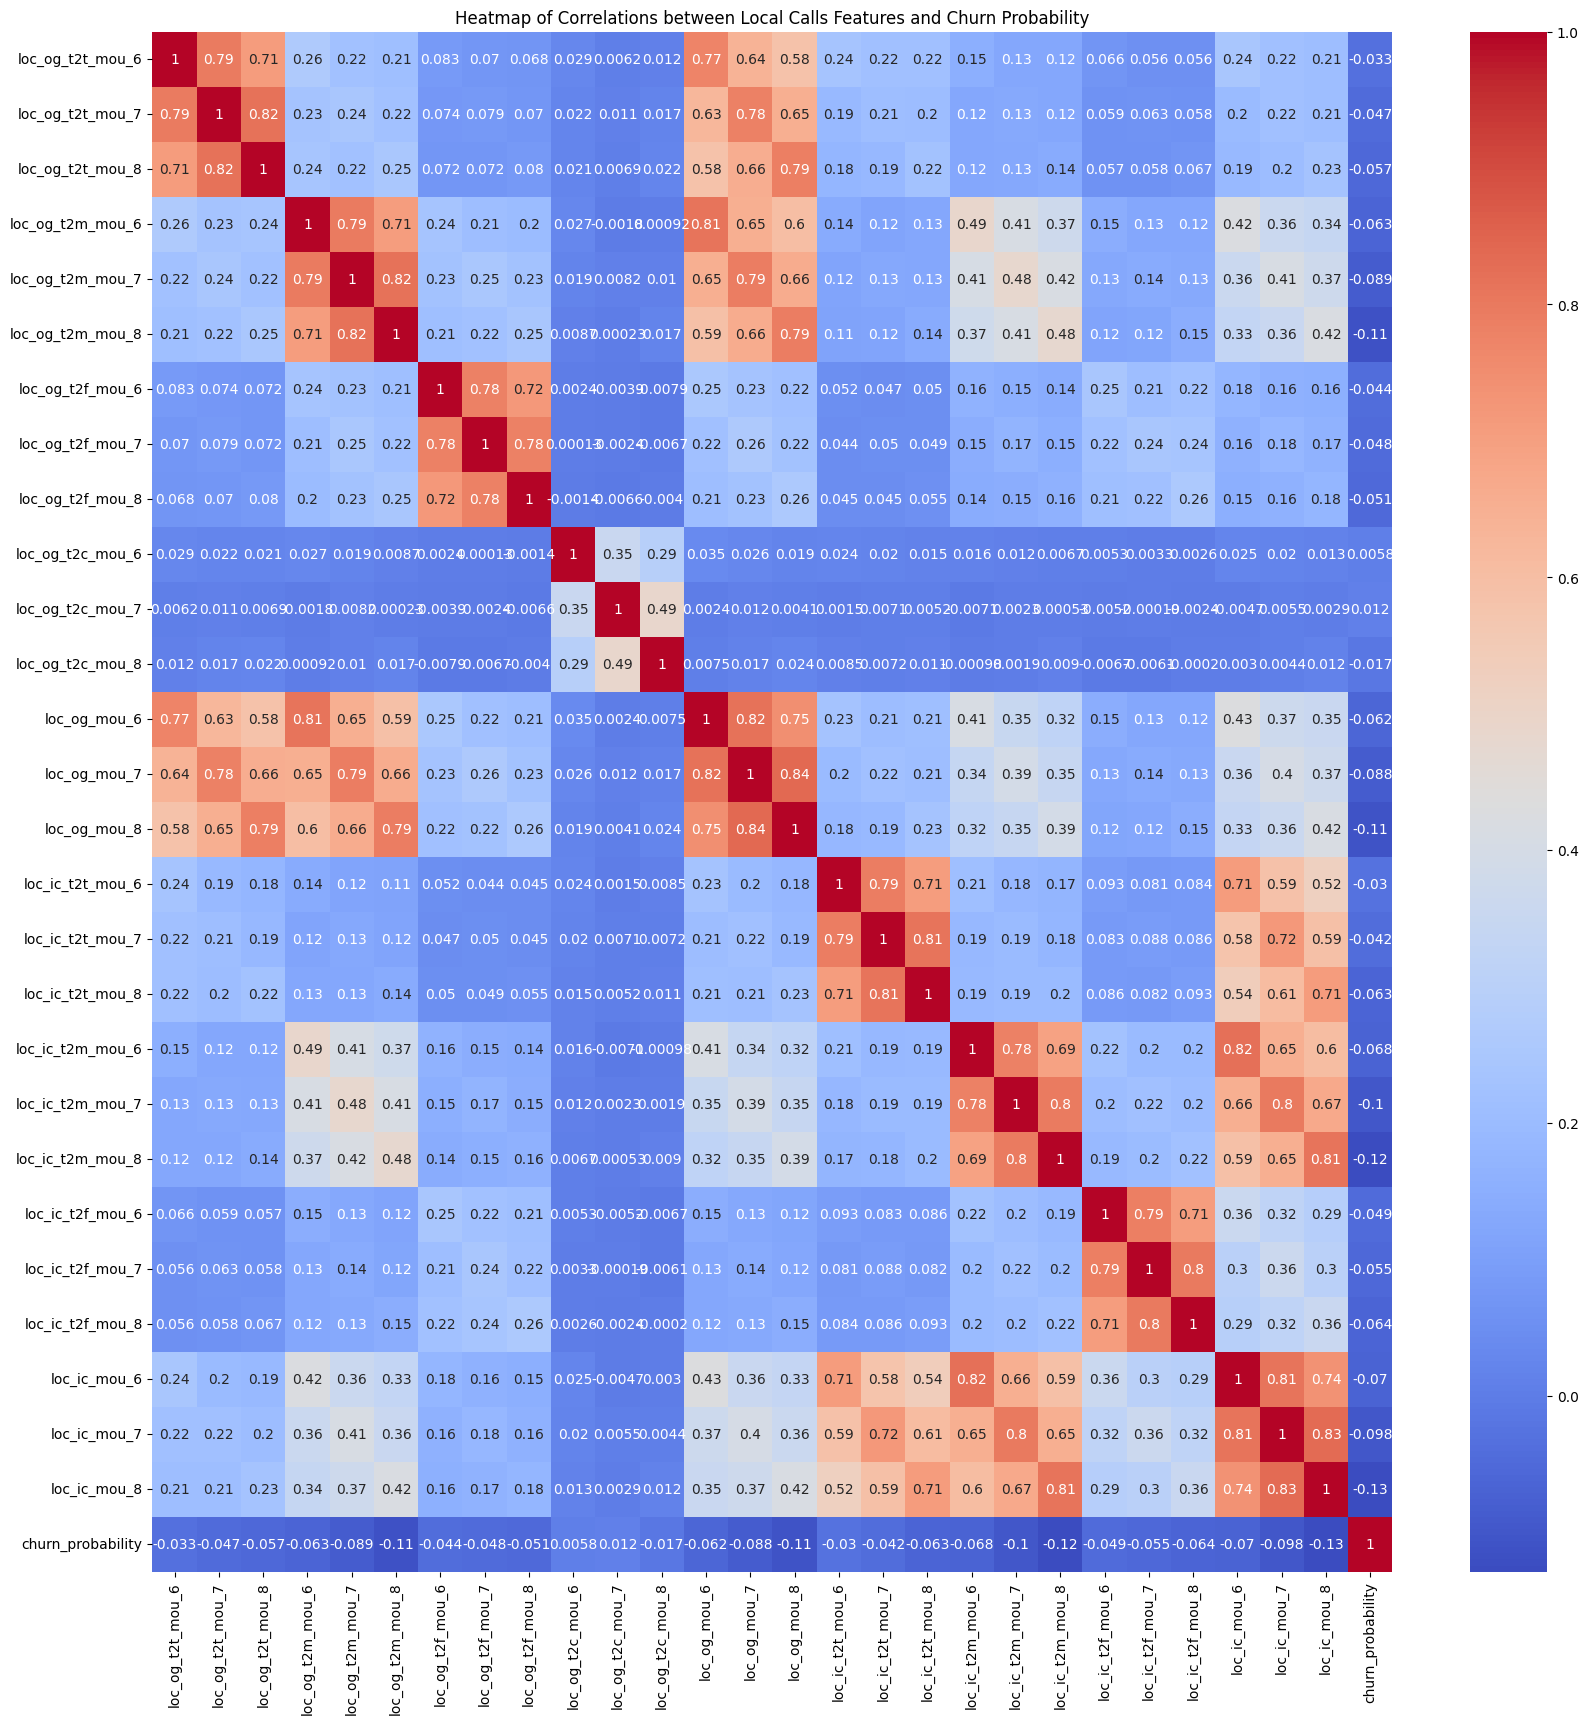

In [113]:
# Selecting the features from local_calls plus the churn_probability
selected_columns = local_calls + ['churn_probability']
correlation_data = data[selected_columns].corr()

# Creating a heatmap
plt.figure(figsize=(20, 20))  # Adjust the size as needed
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations between Local Calls Features and Churn Probability')
plt.show()

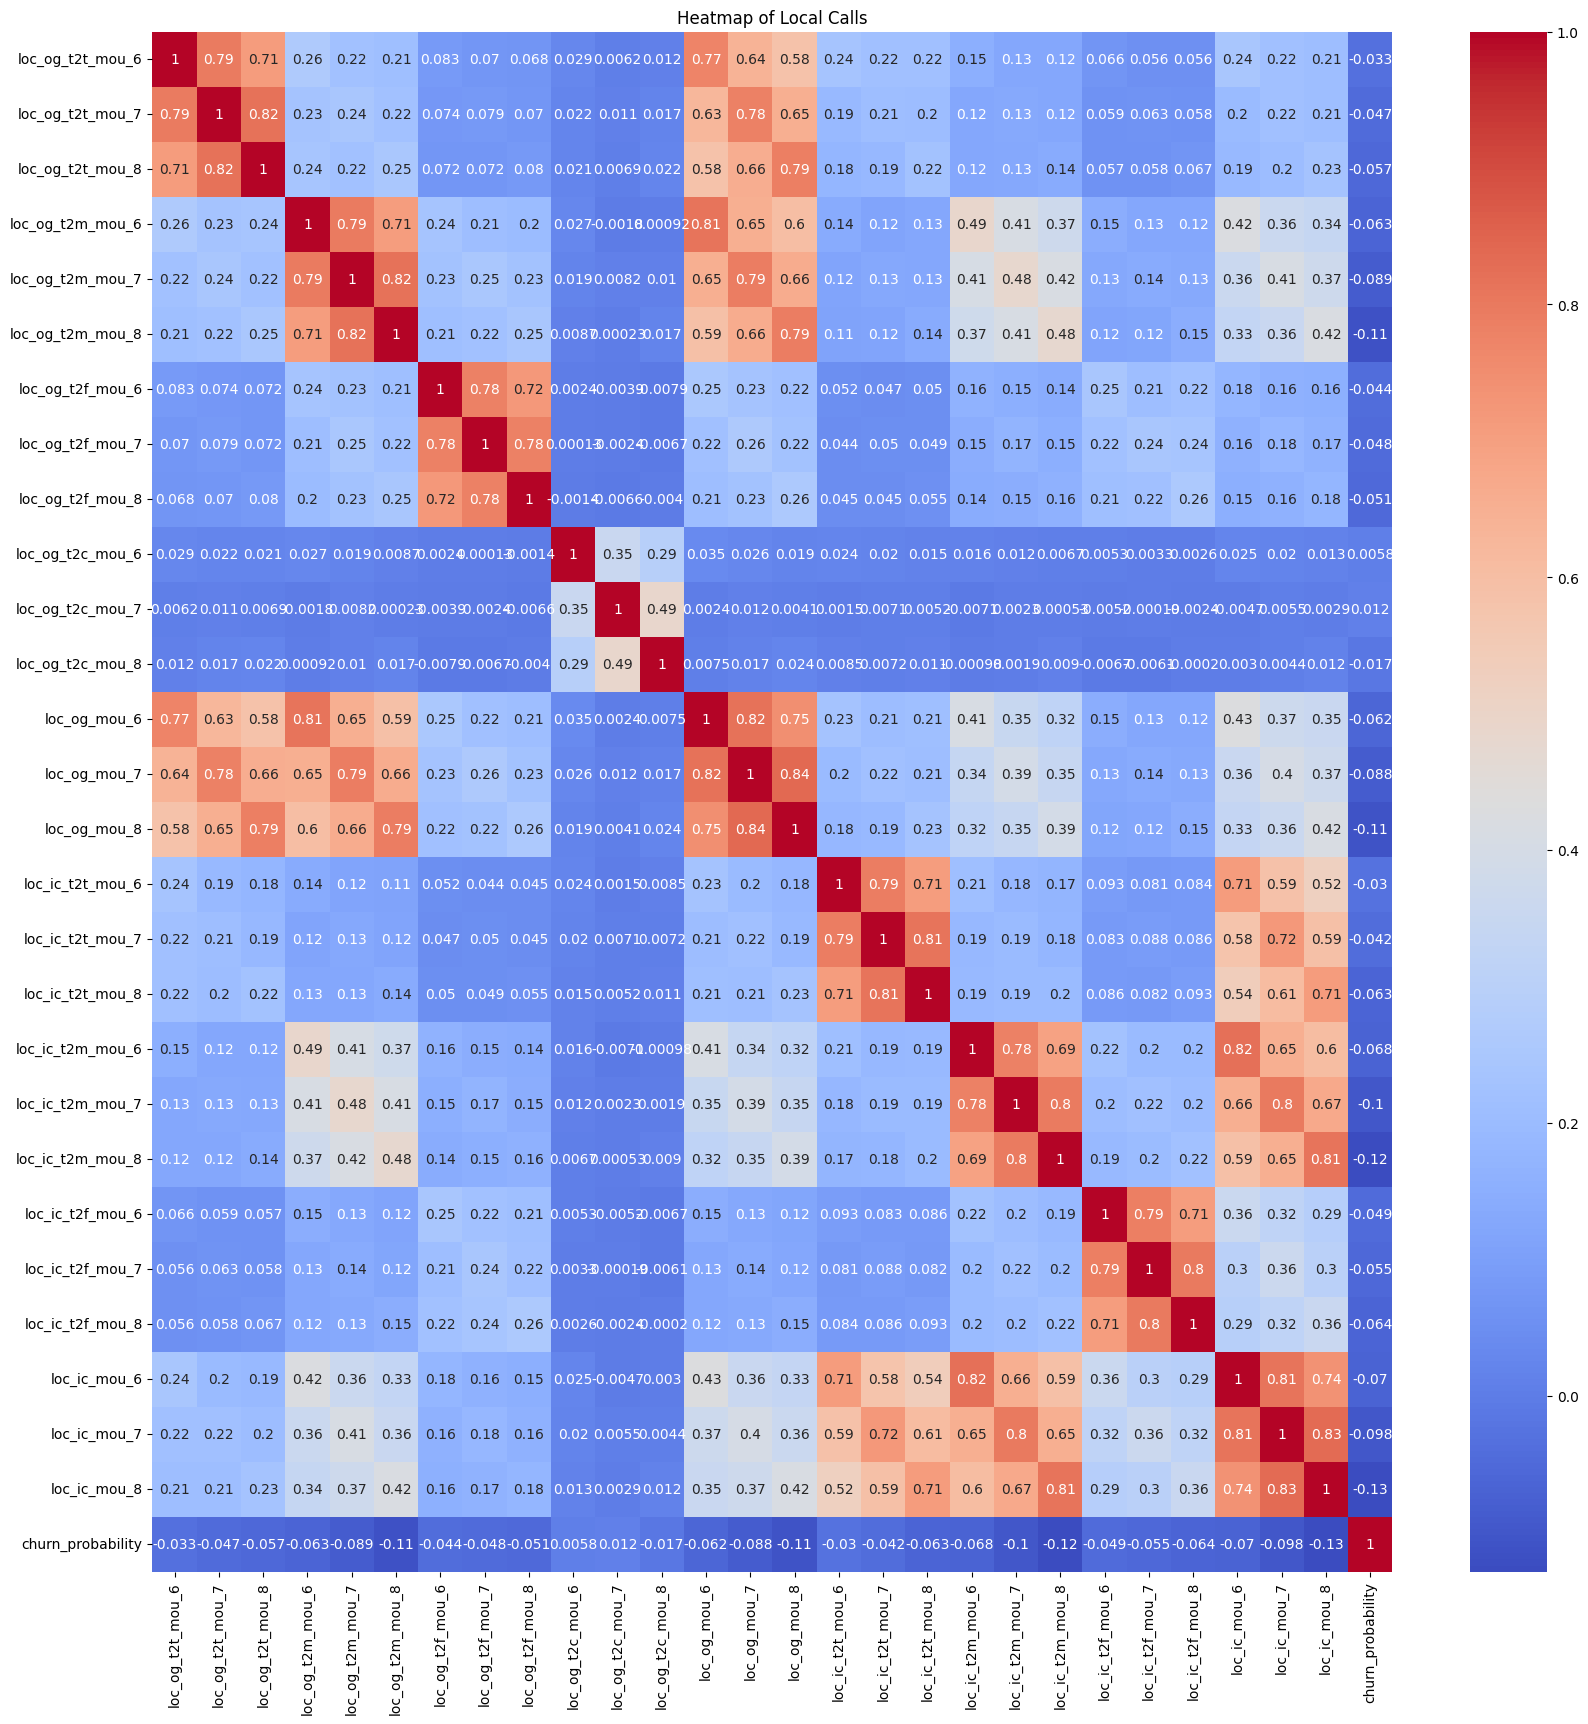

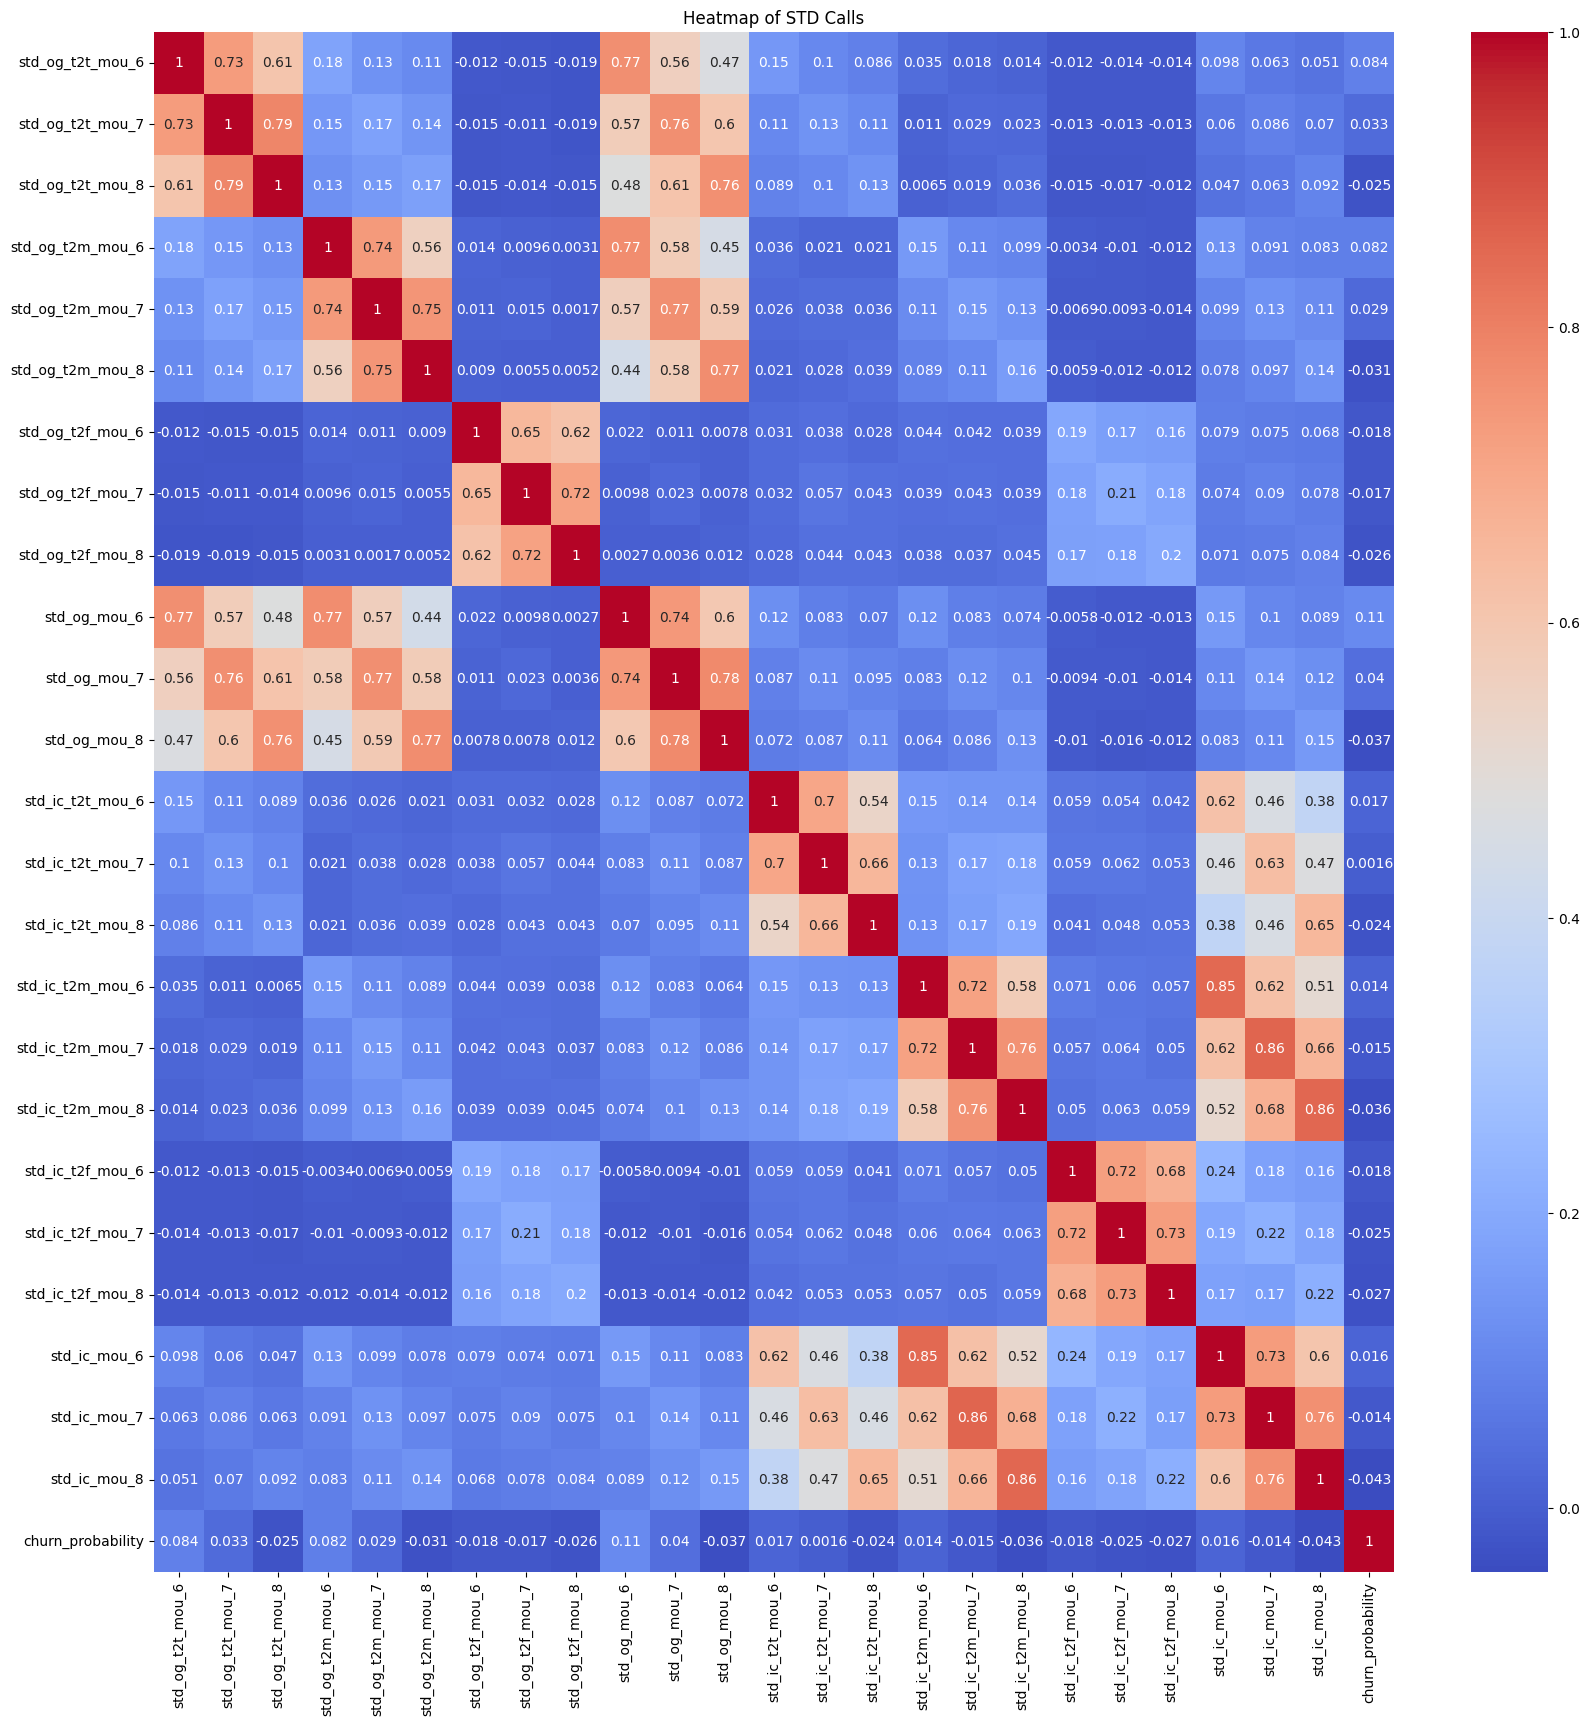

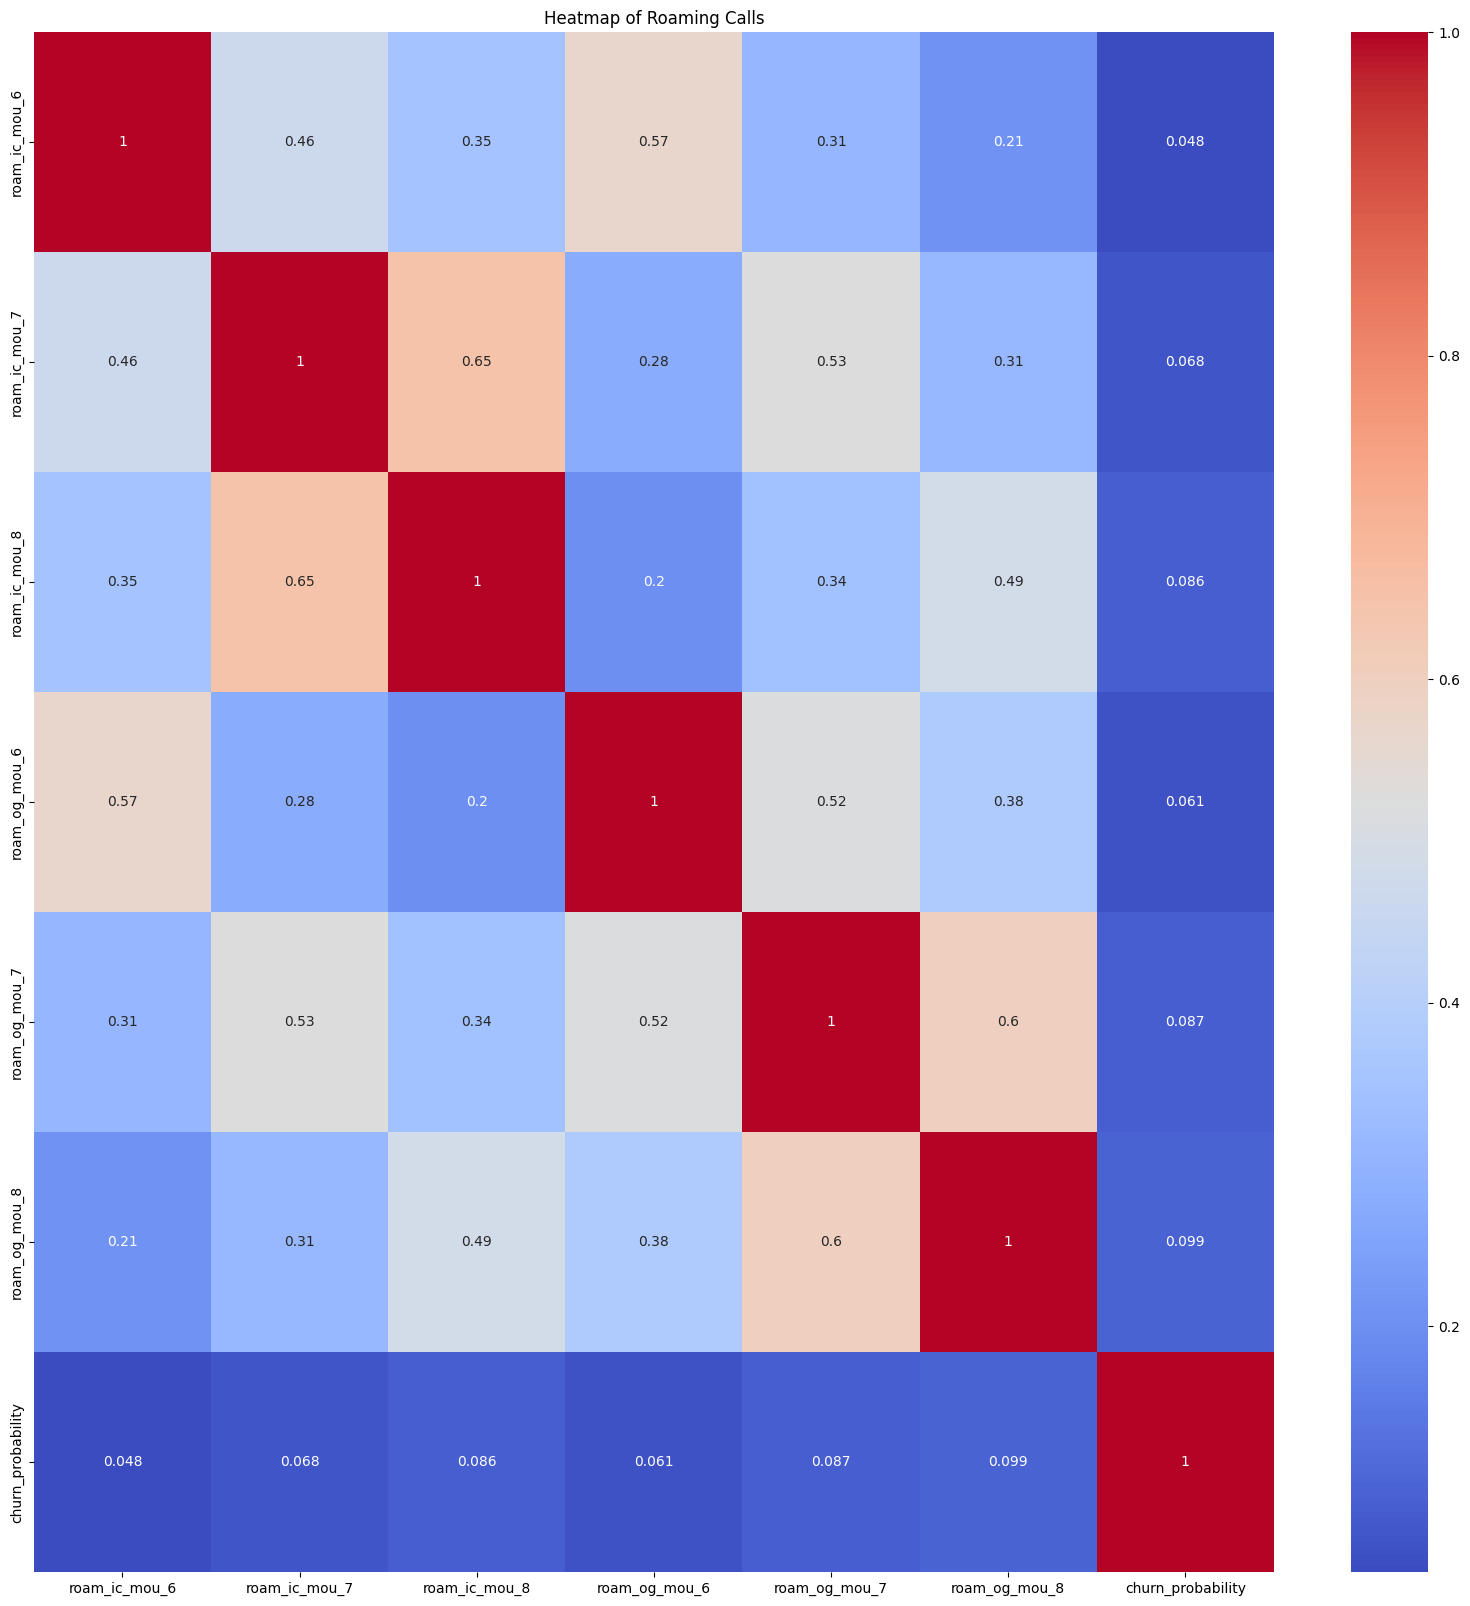

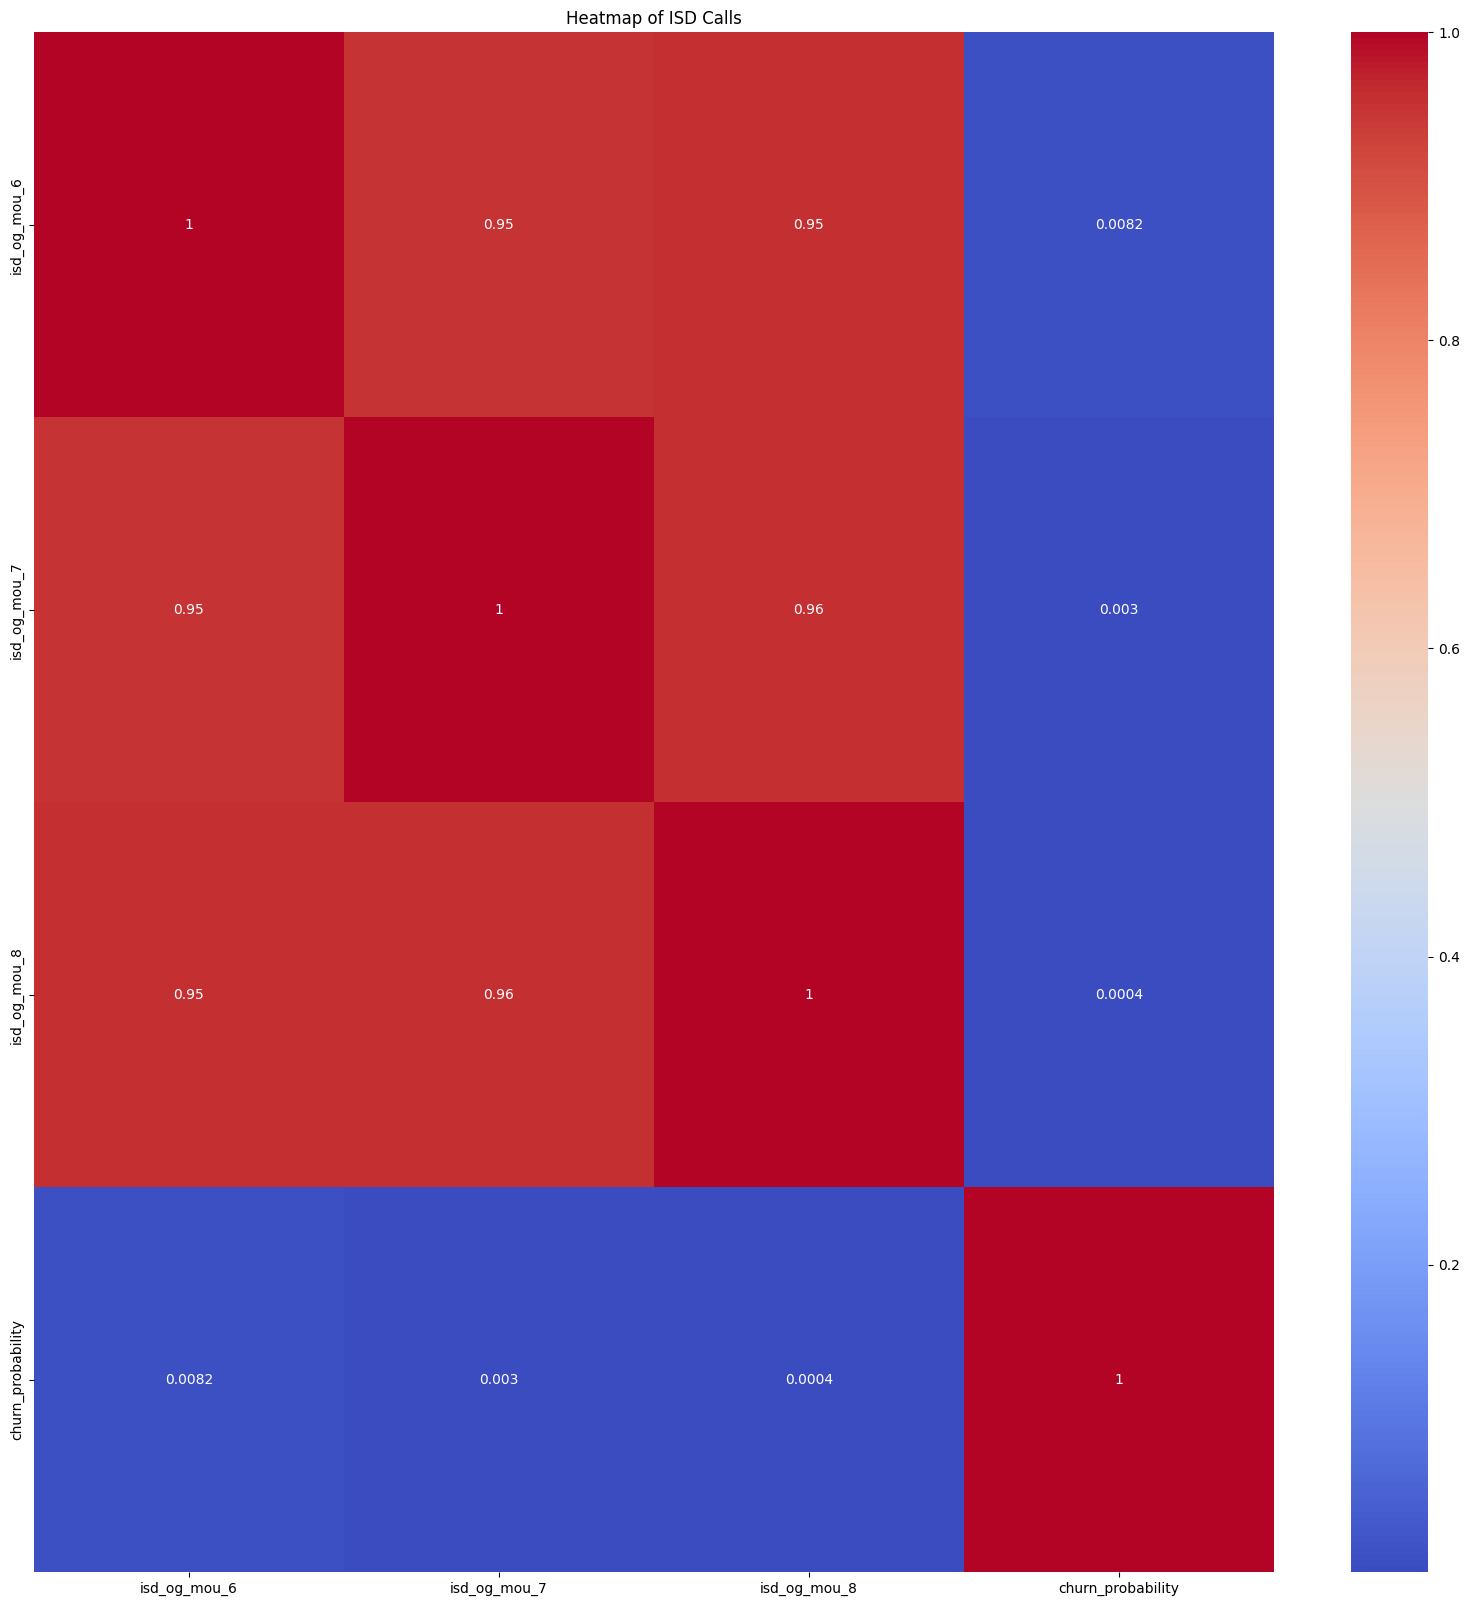

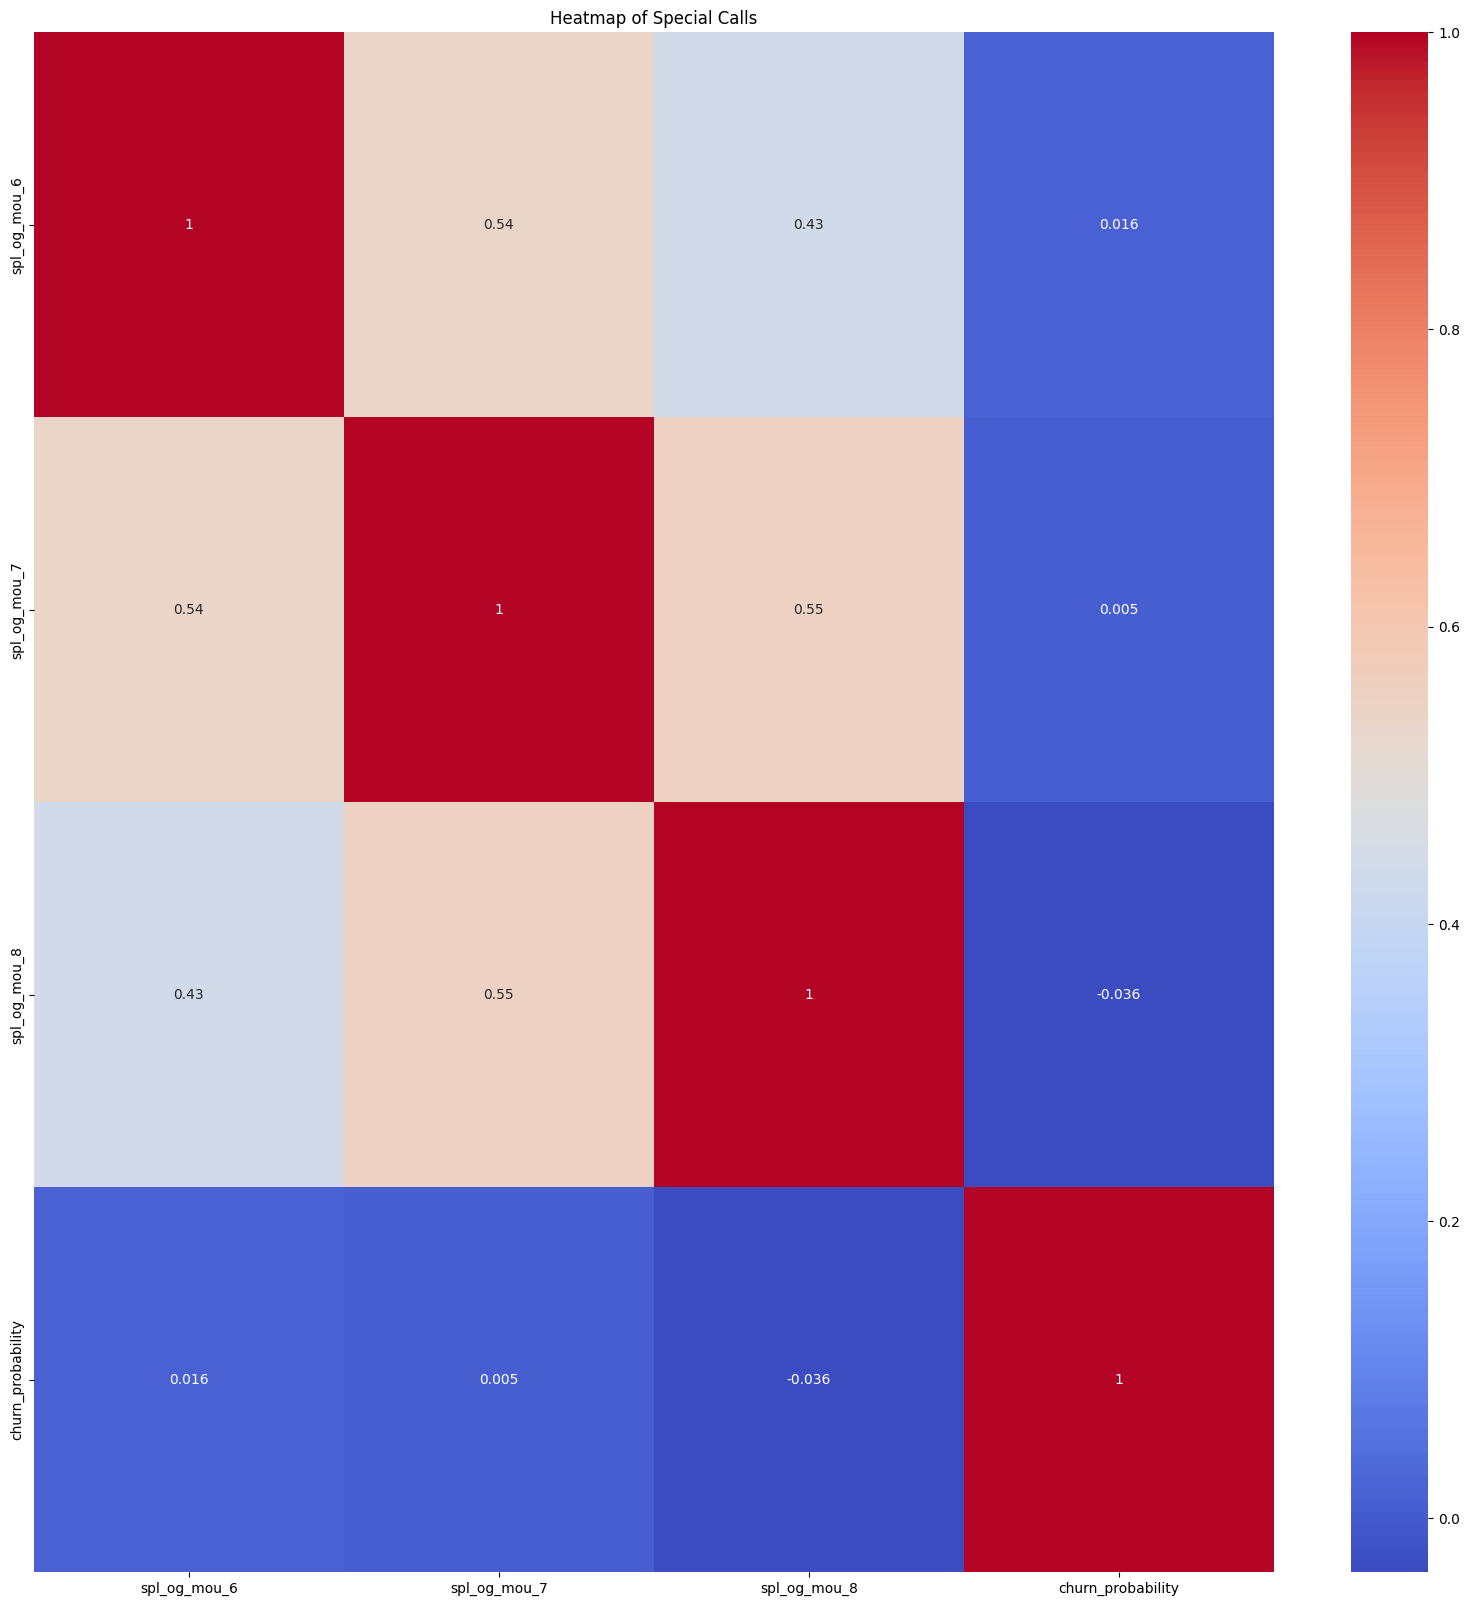

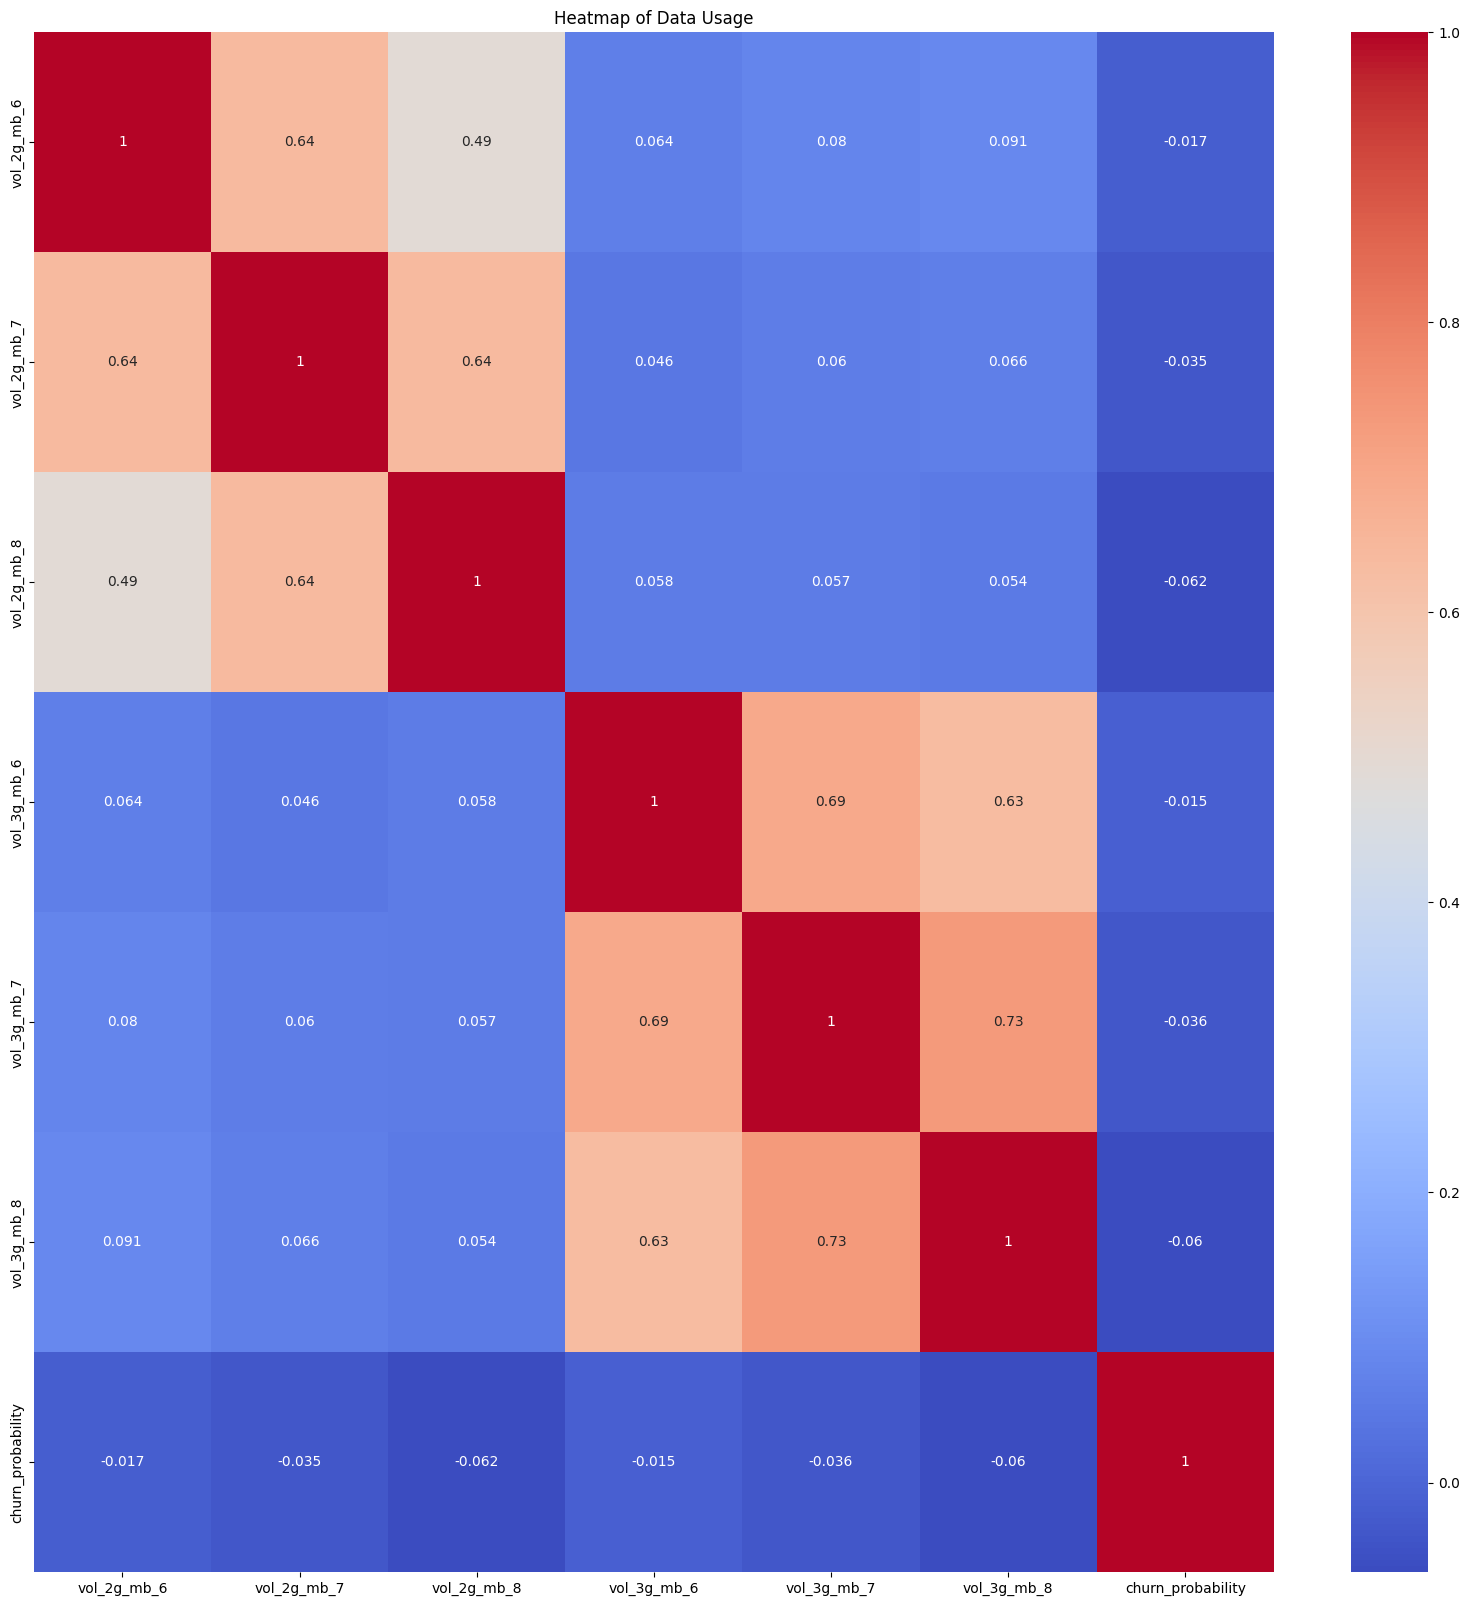

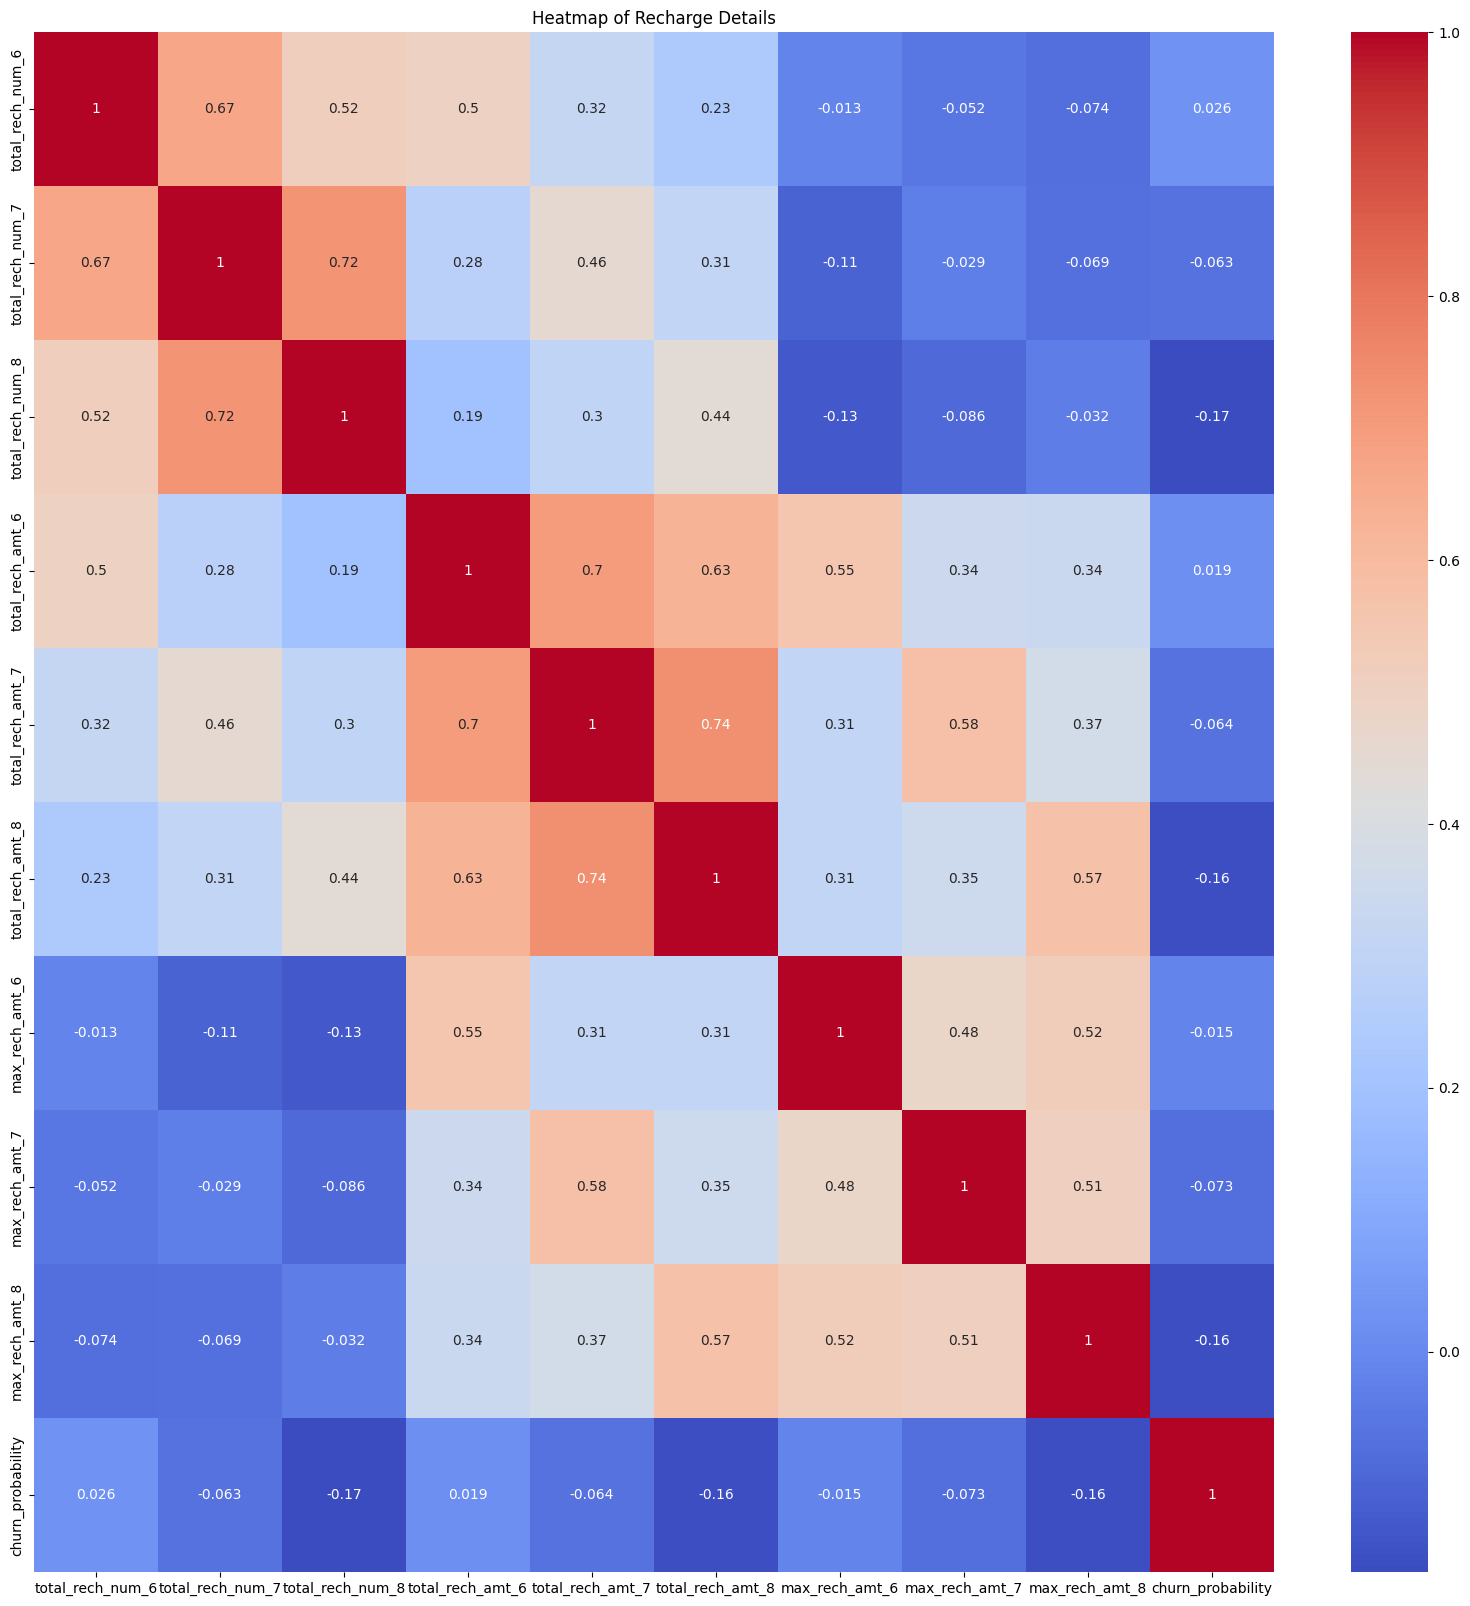

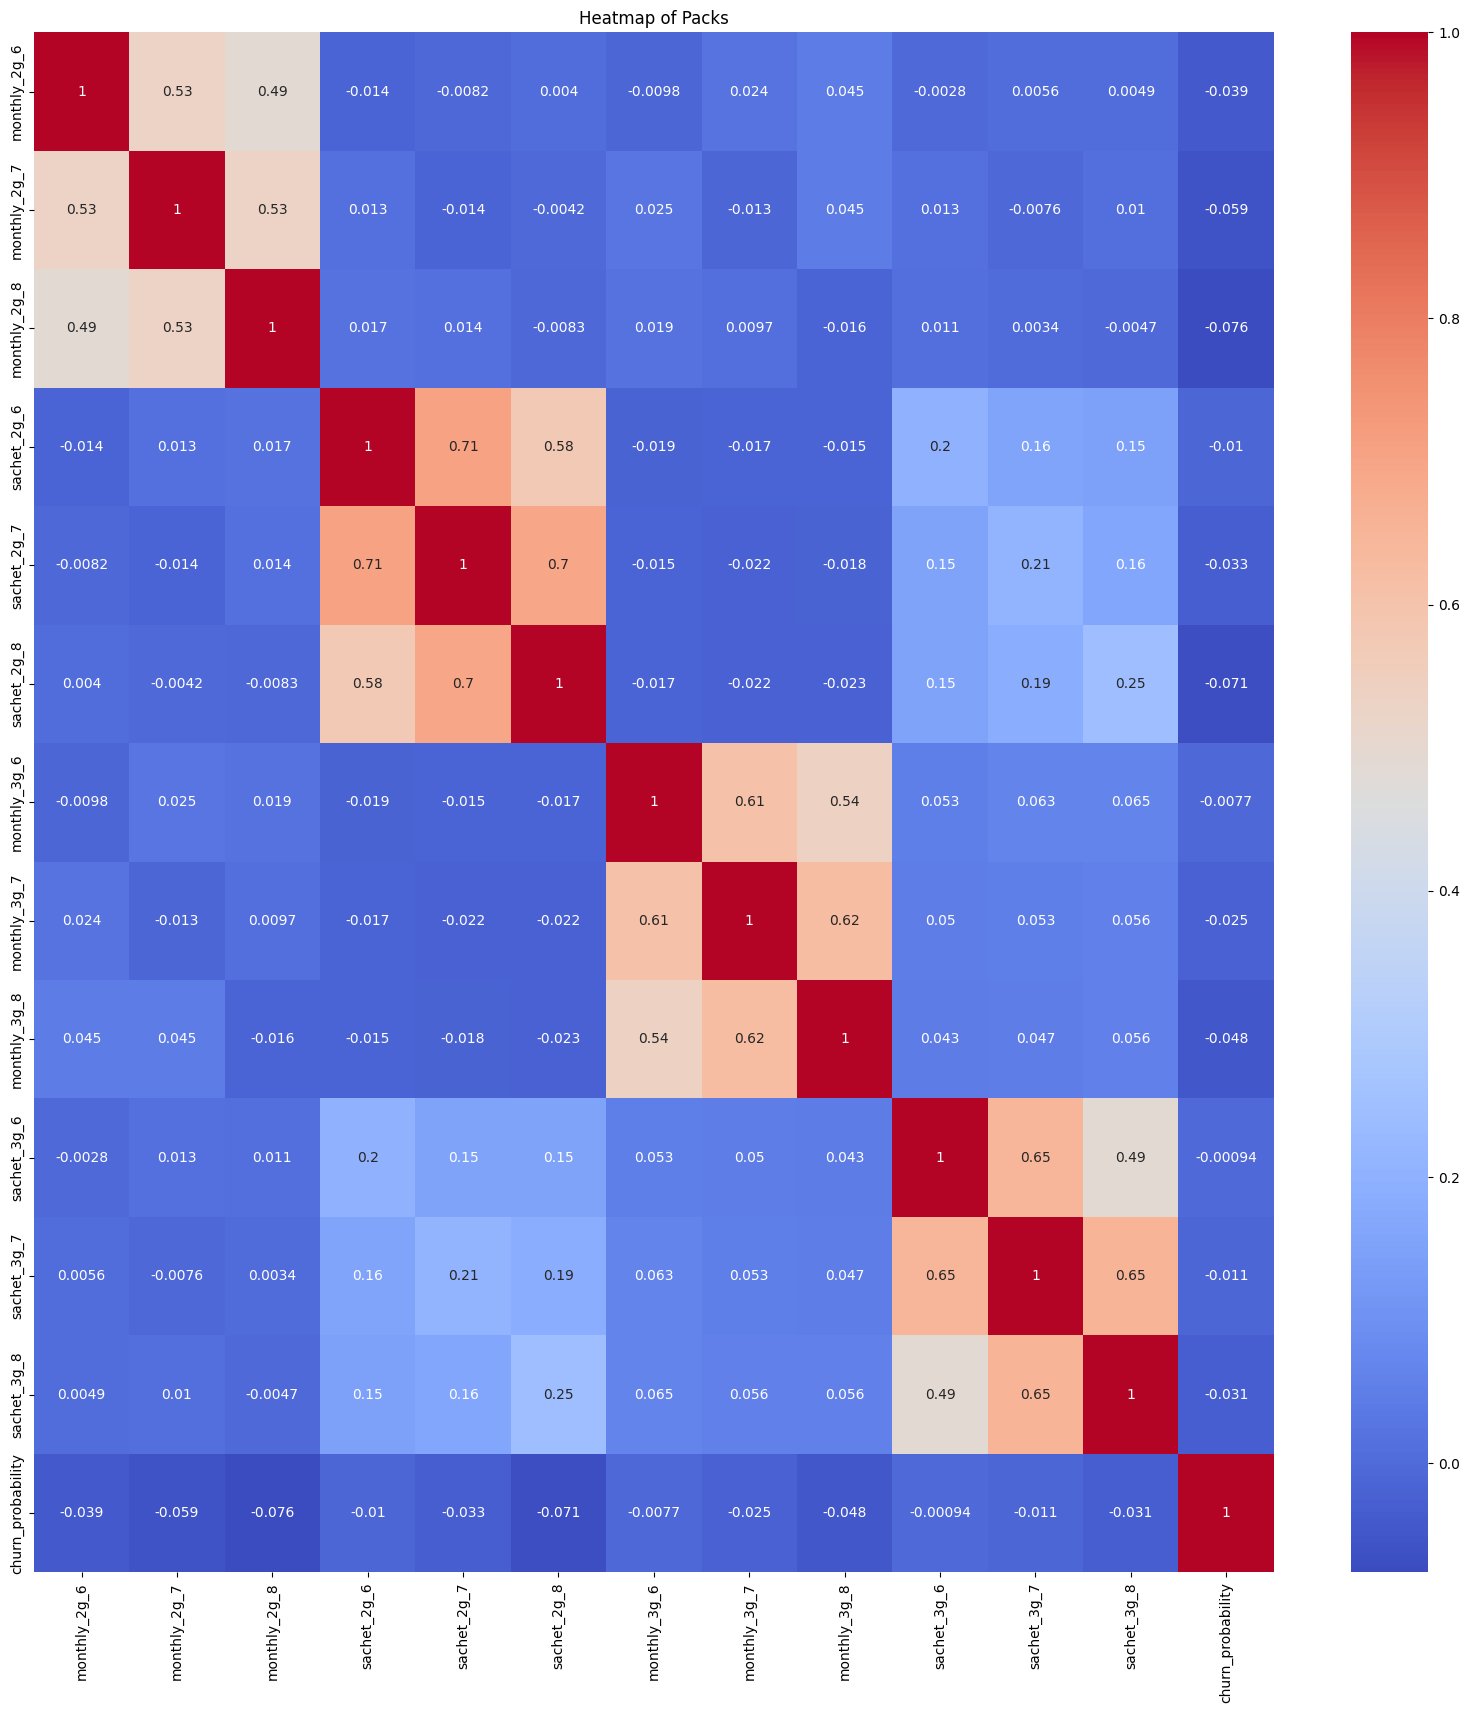

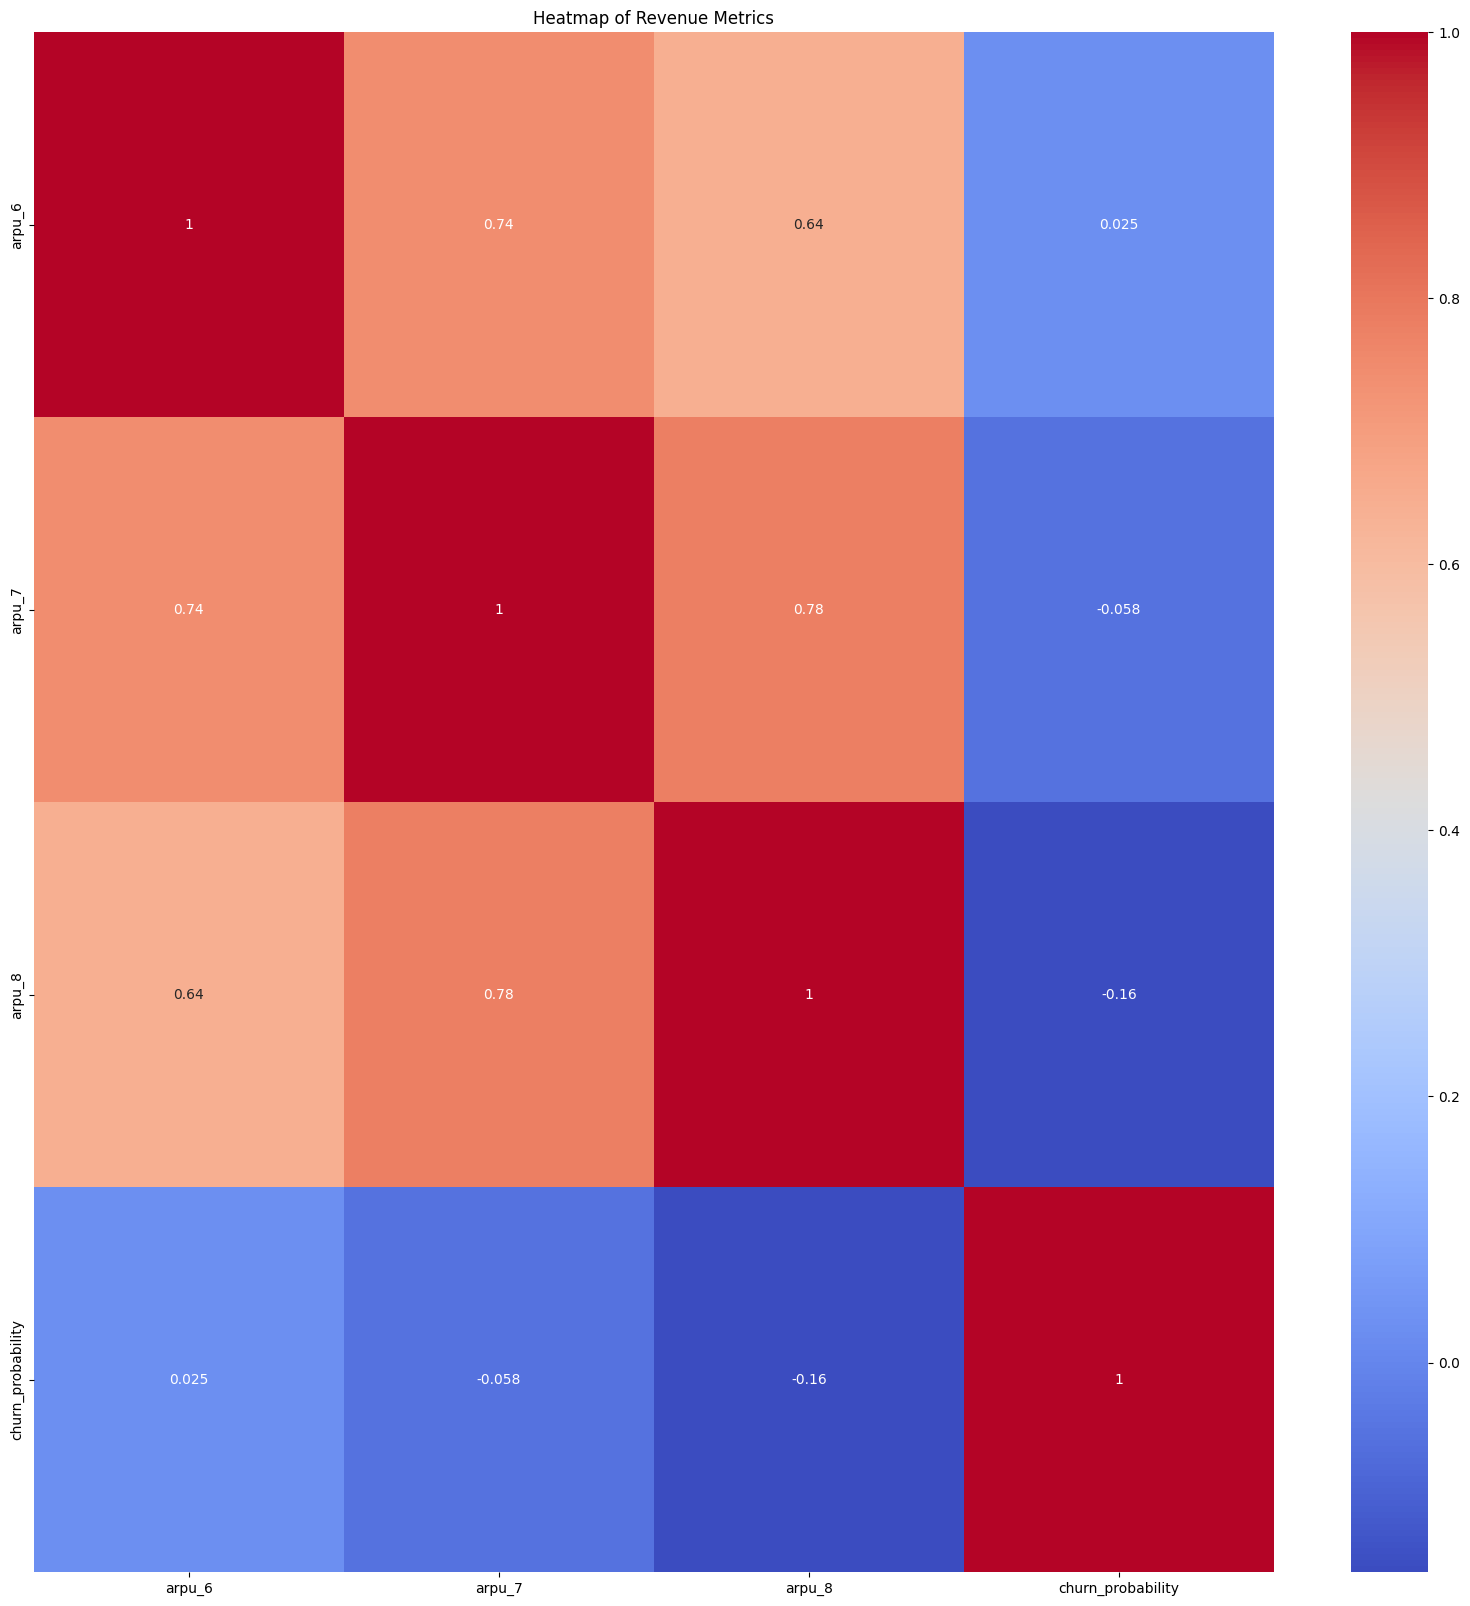

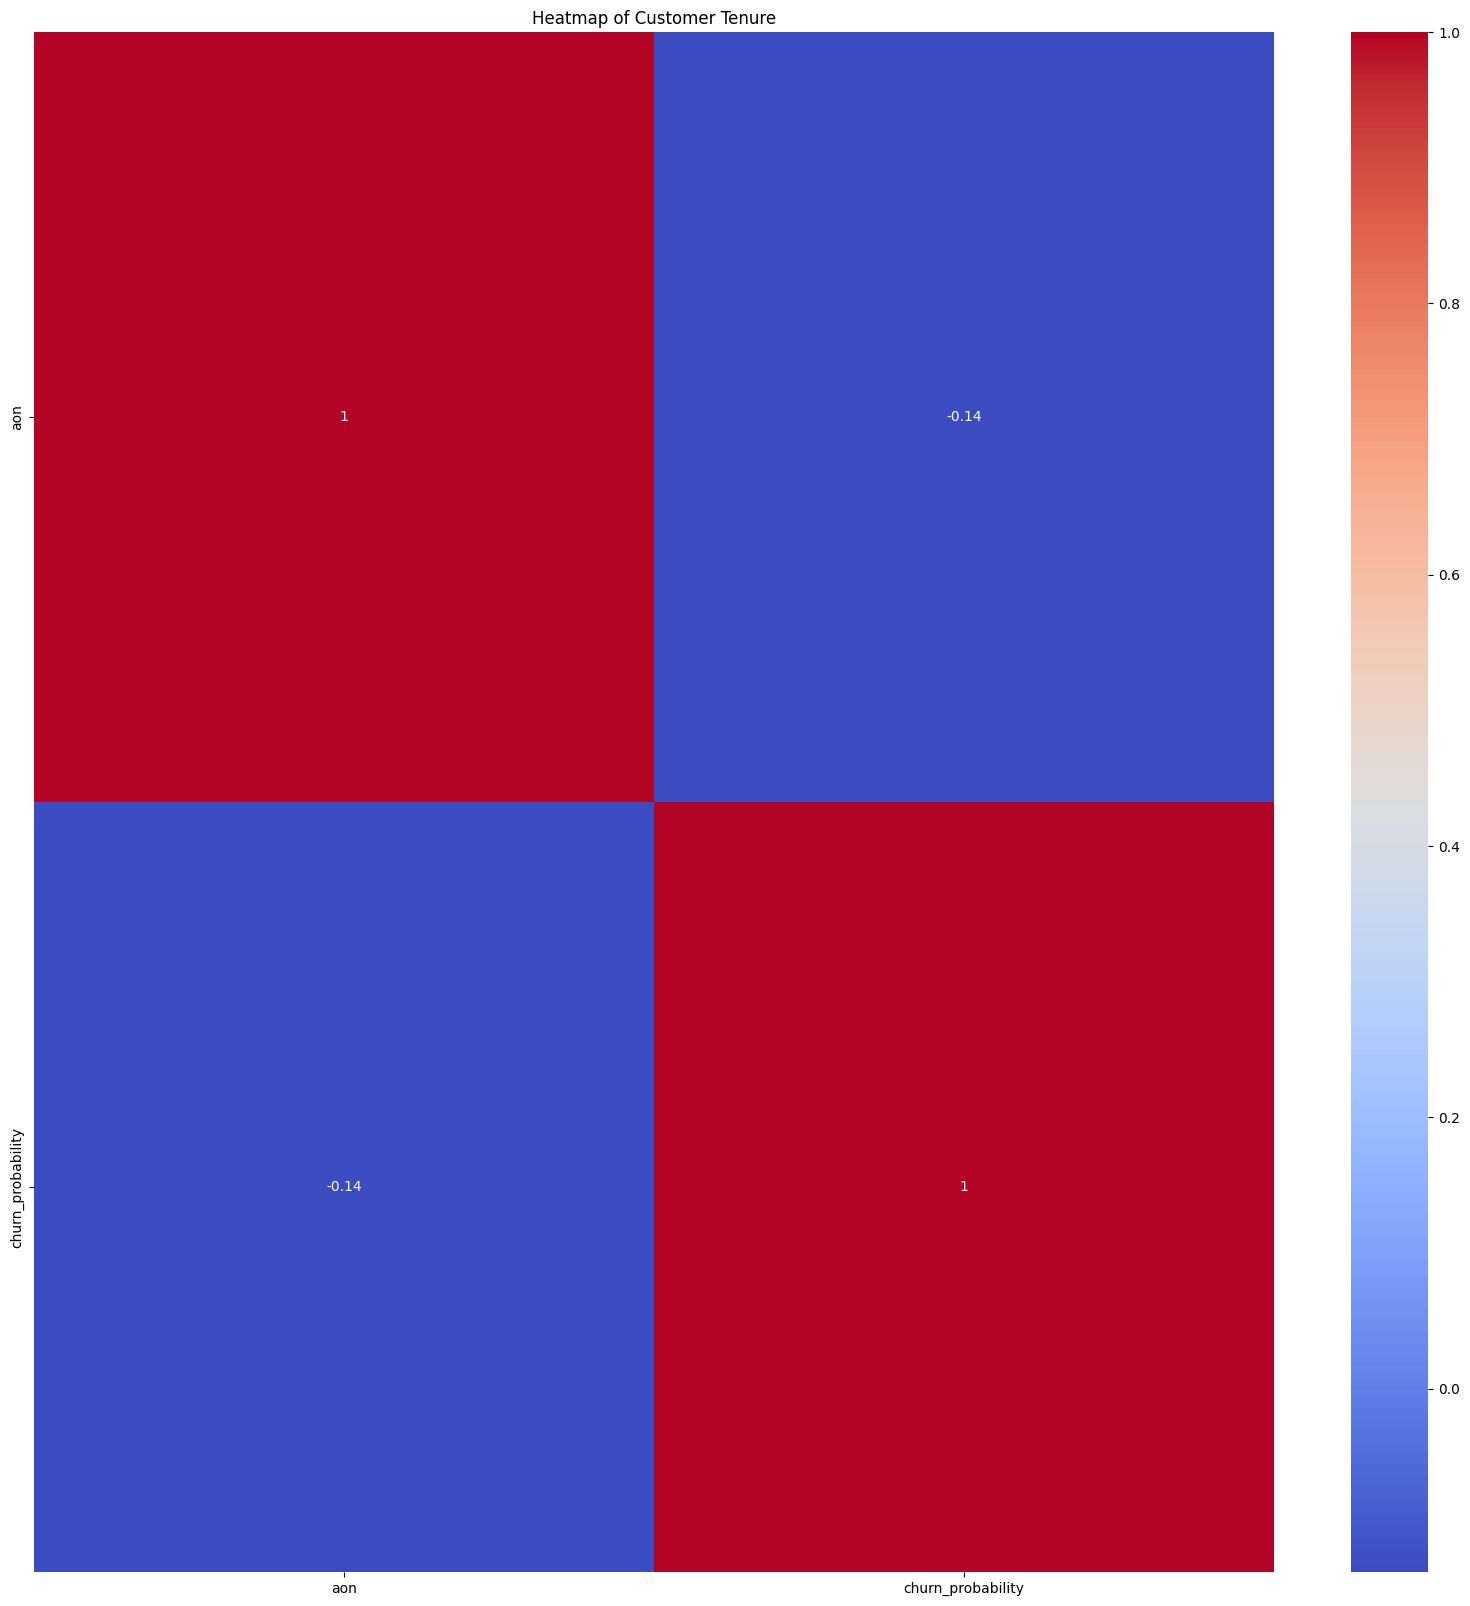

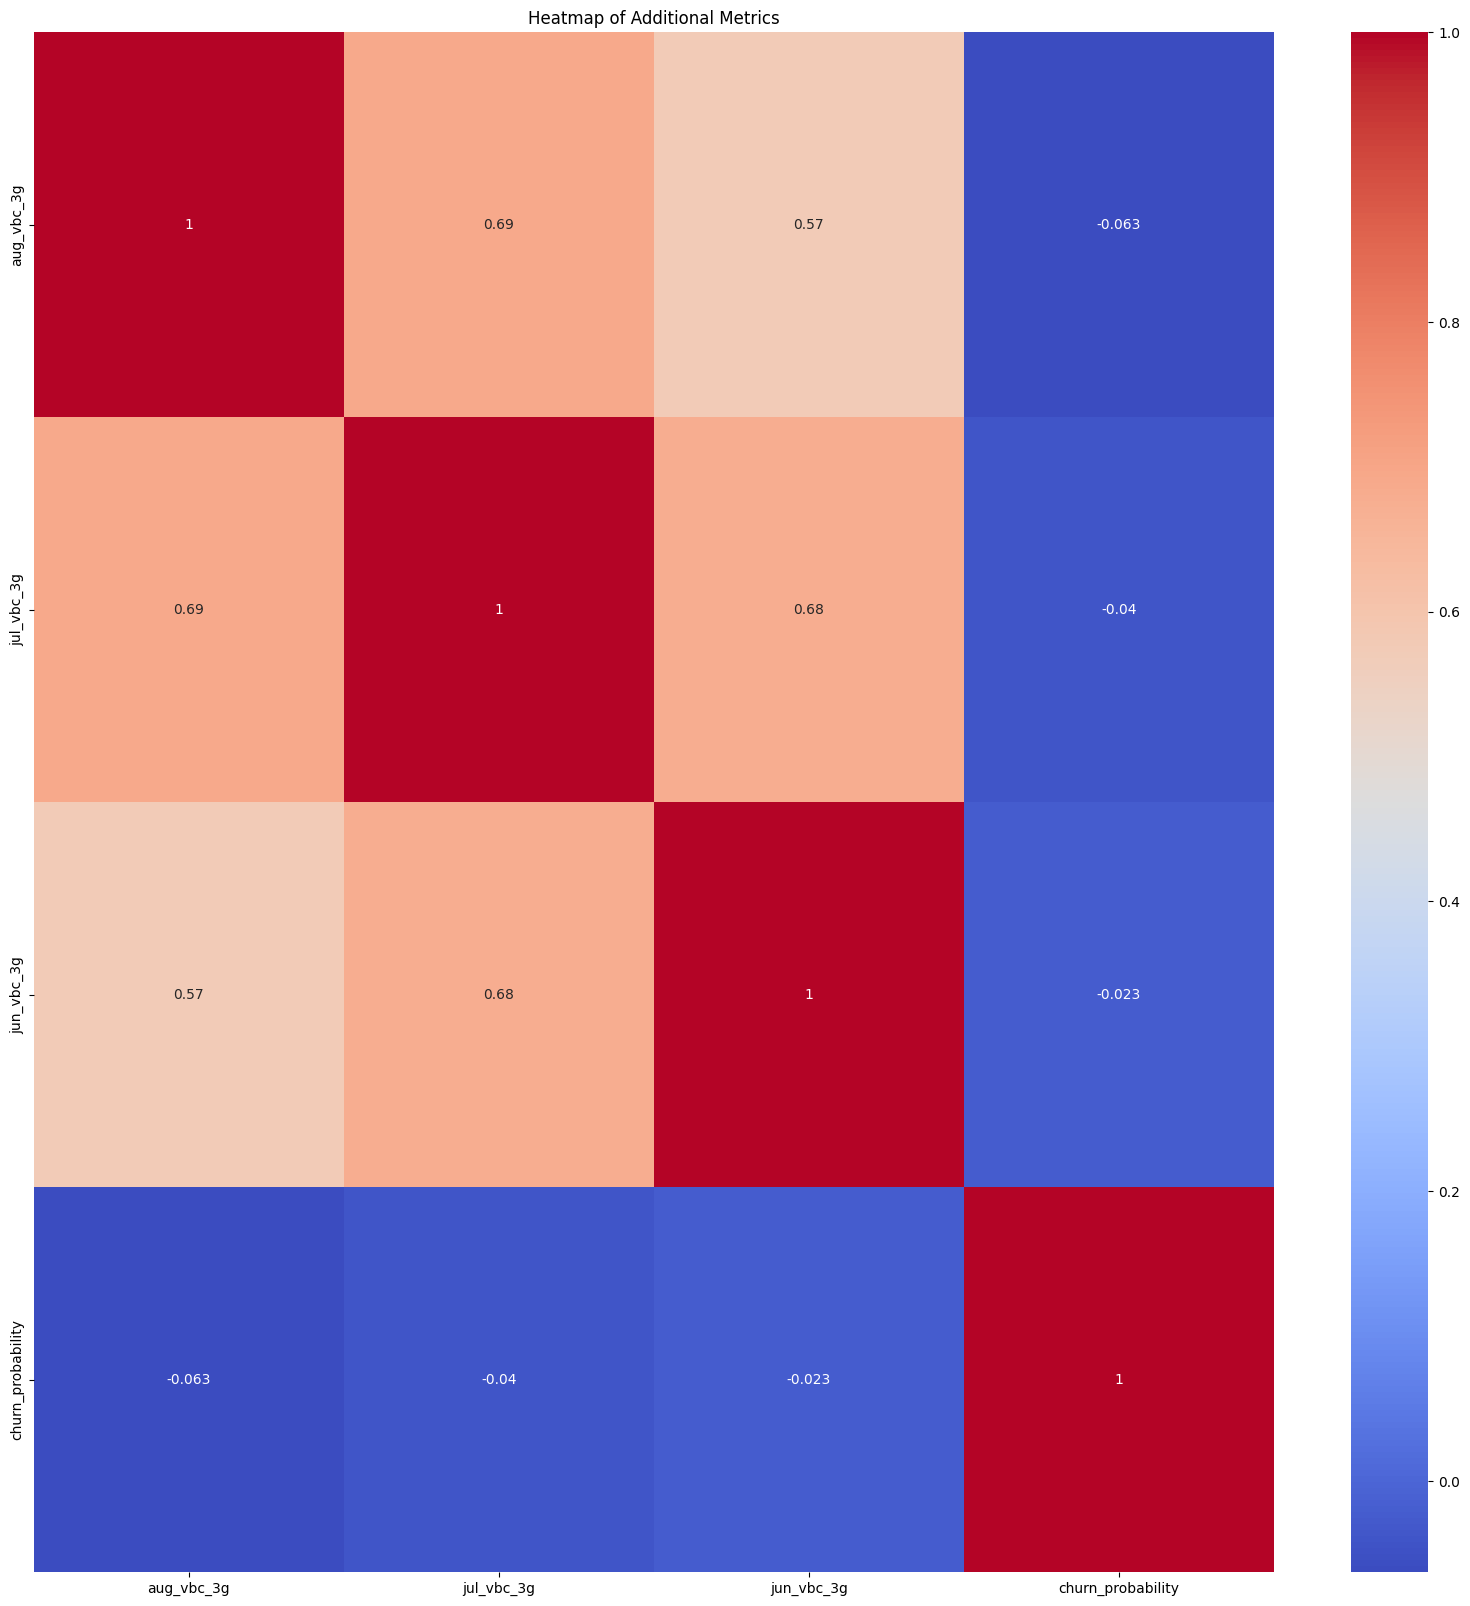

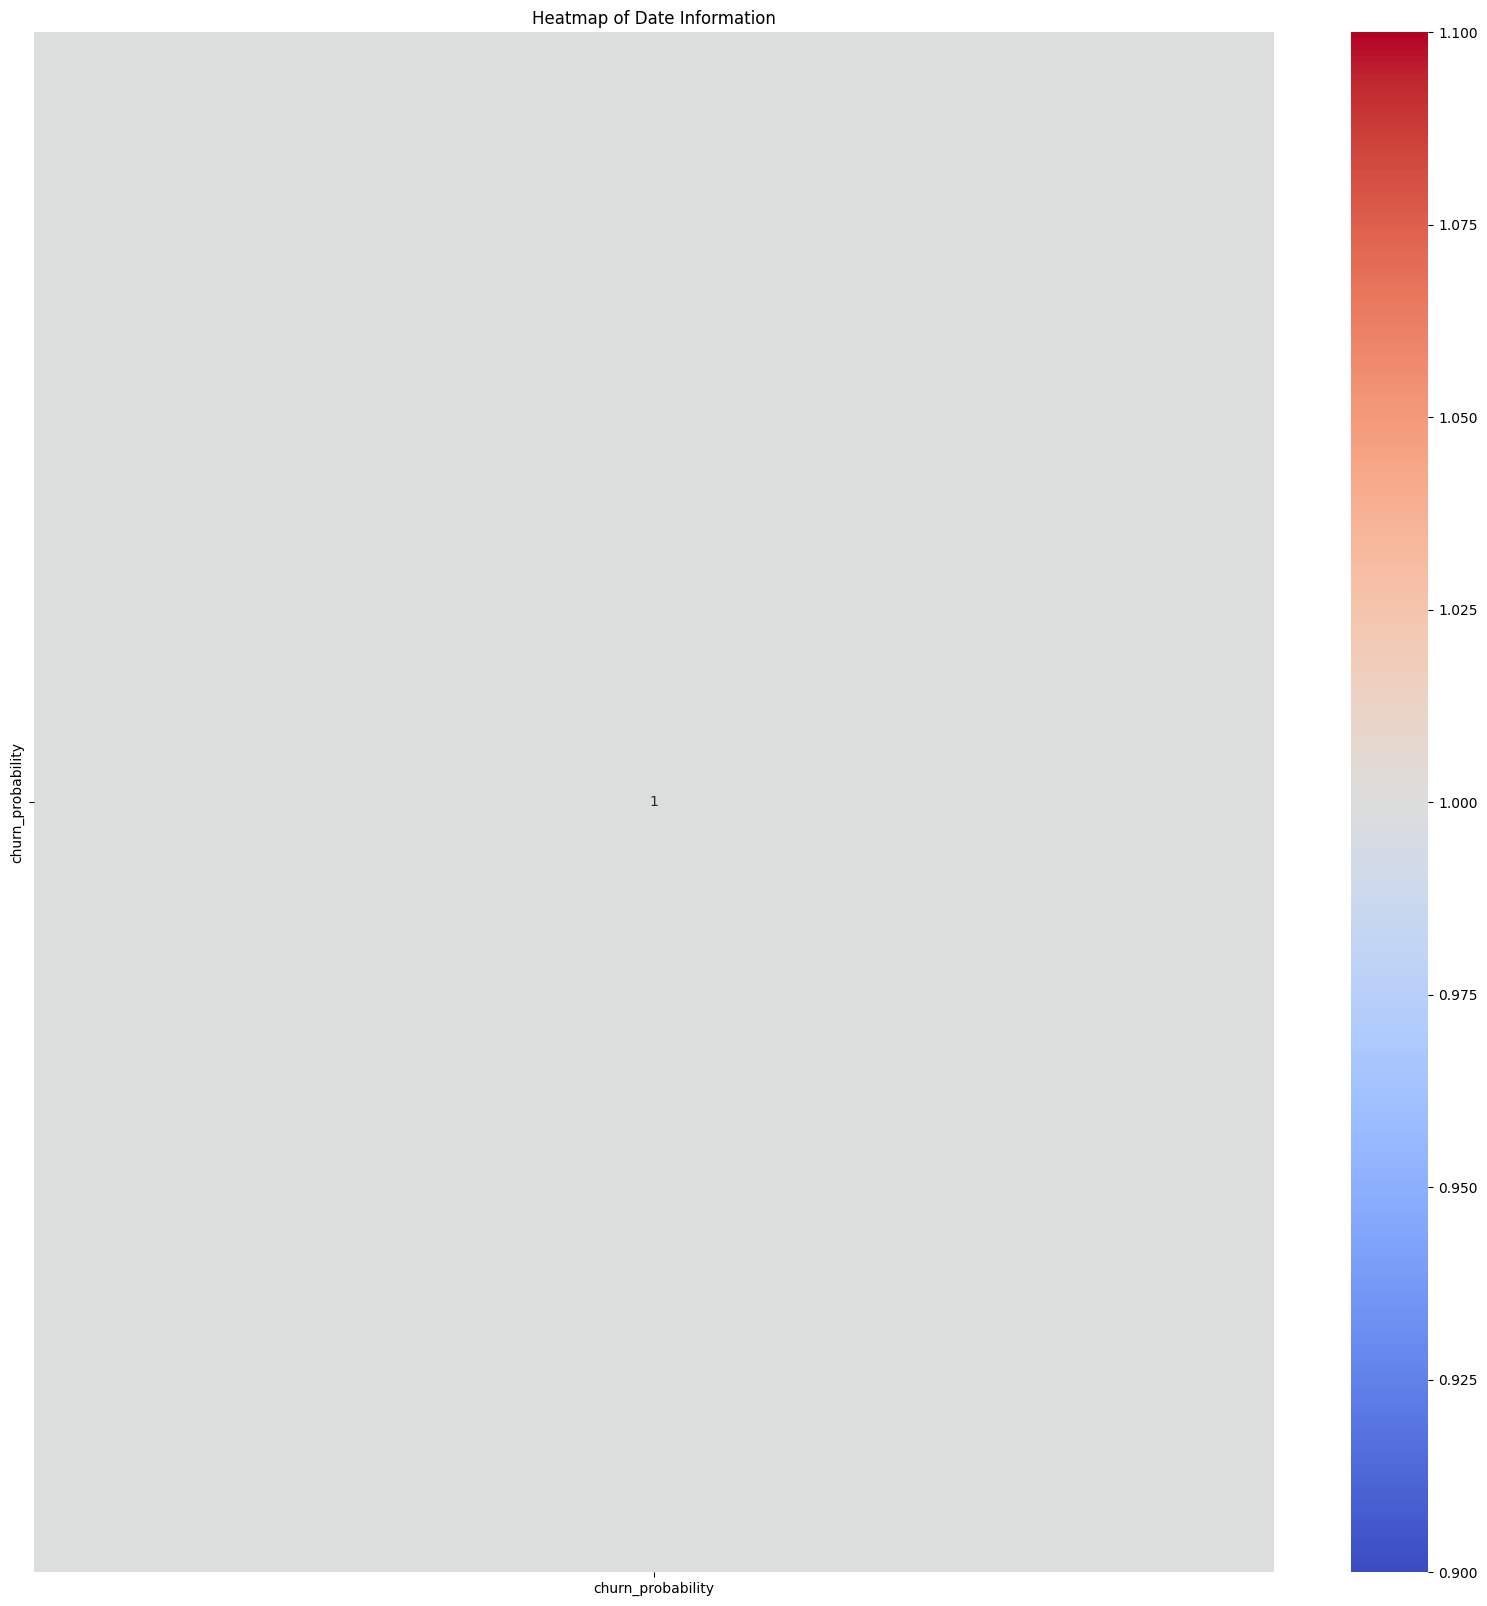

In [114]:
features_groups = {
    "Local Calls": local_calls,
    "STD Calls": std_calls,
    "Roaming Calls": roaming_calls,
    "ISD Calls": isd_calls,
    "Special Calls": spl_calls,
    "Data Usage": data_usage,
    "Recharge Details": recharge_details,
    "Packs": packs,
    "Revenue Metrics": arpu,
    "Customer Tenure": customer_tenure,
    "Additional Metrics": vbc,
    "Date Information": date_info
}

for group_name in features_groups:
    features_groups[group_name].append('churn_probability')

# Iterate through each group and create a heatmap
for group_name, cols in features_groups.items():
    if cols:  
        plt.figure(figsize=(20, 20))  
        sns.heatmap(data[cols].corr(), annot=True, cmap='coolwarm')
        plt.title(f'Heatmap of {group_name}')
        plt.show()

## Boxplot to show outliner of the feature

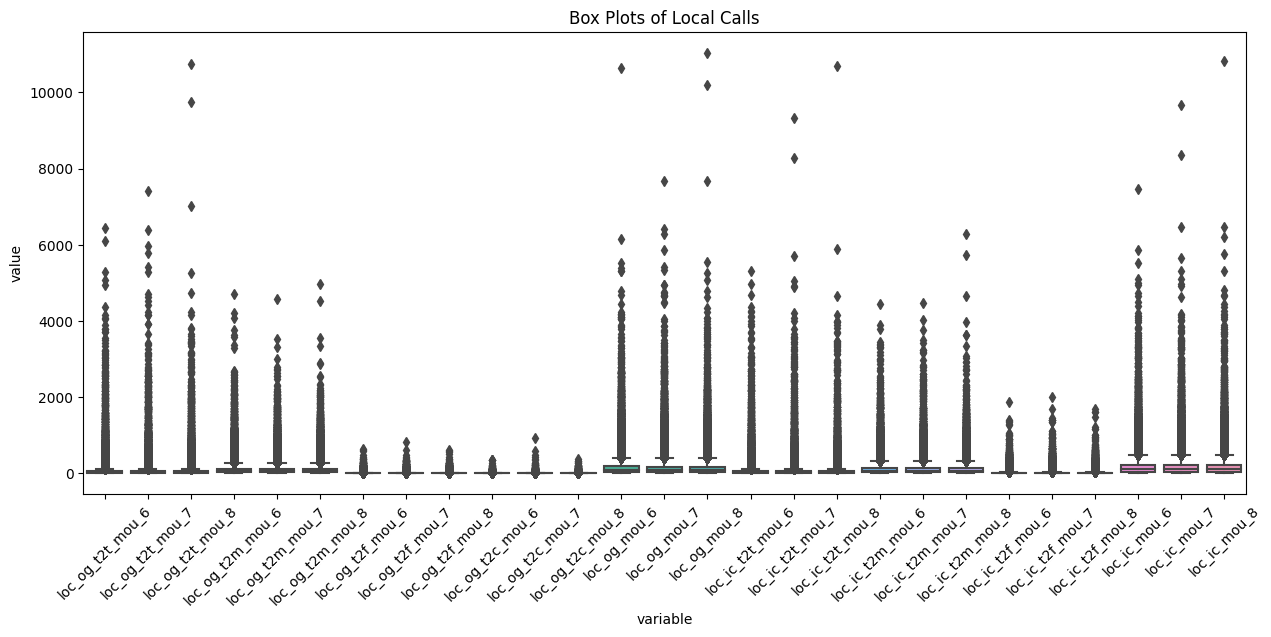

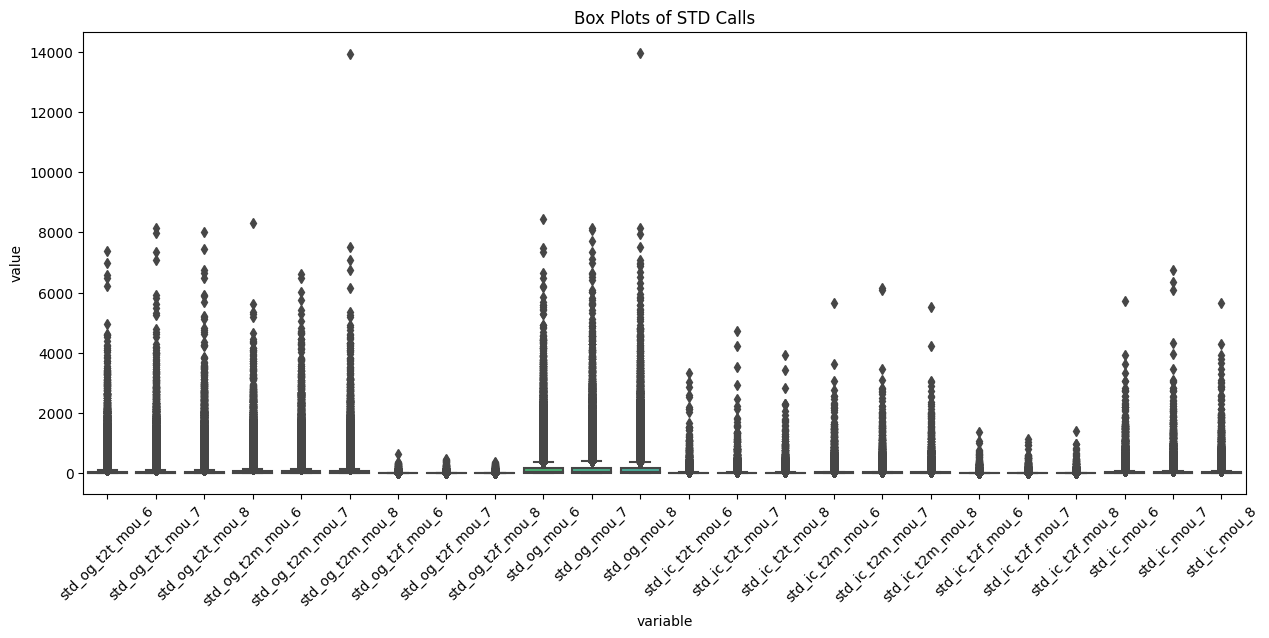

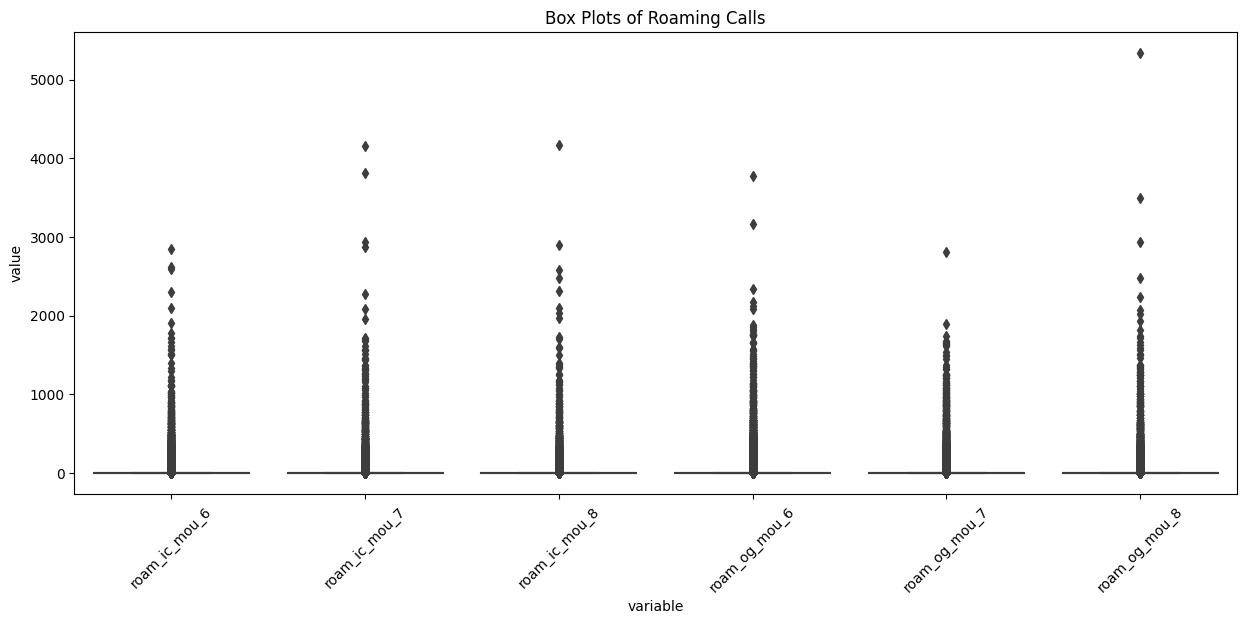

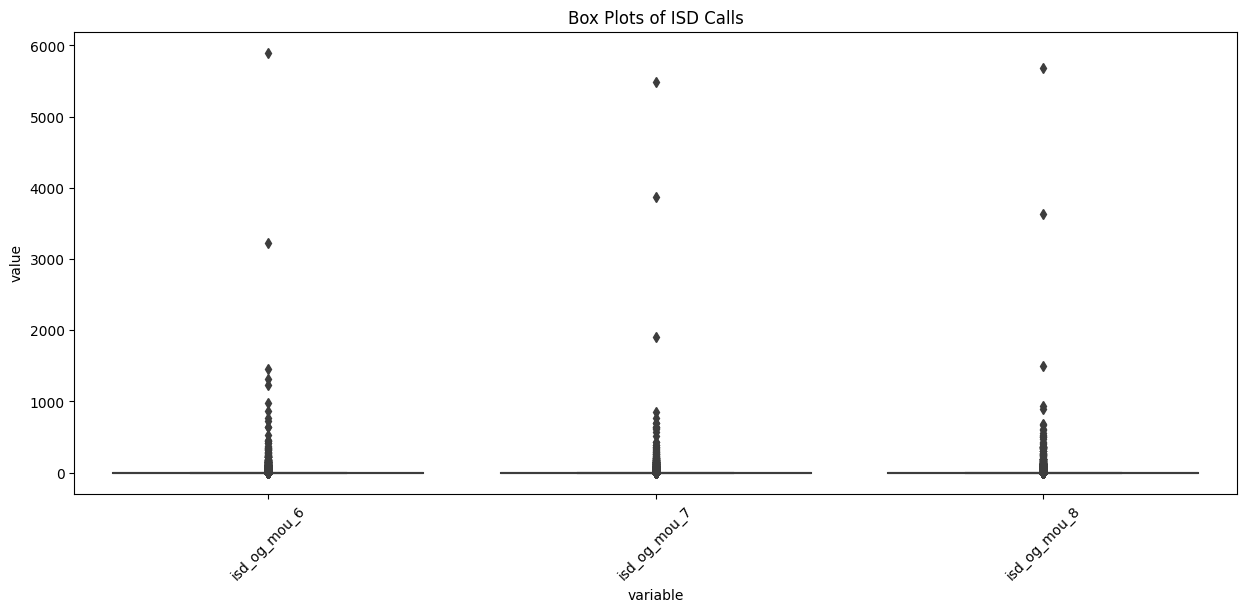

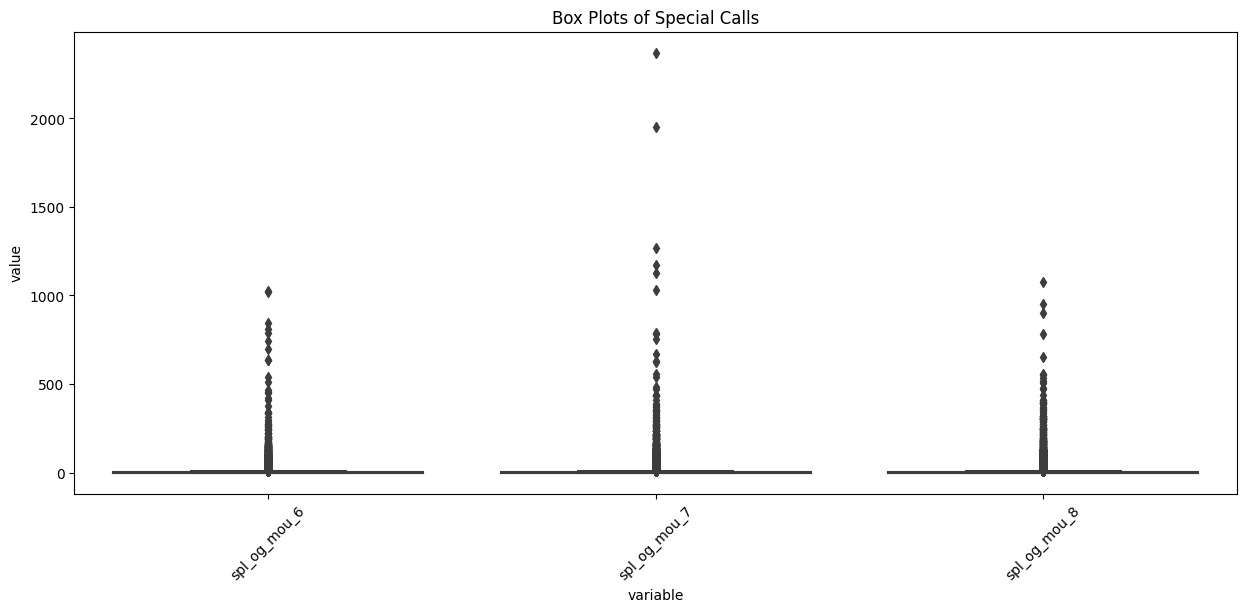

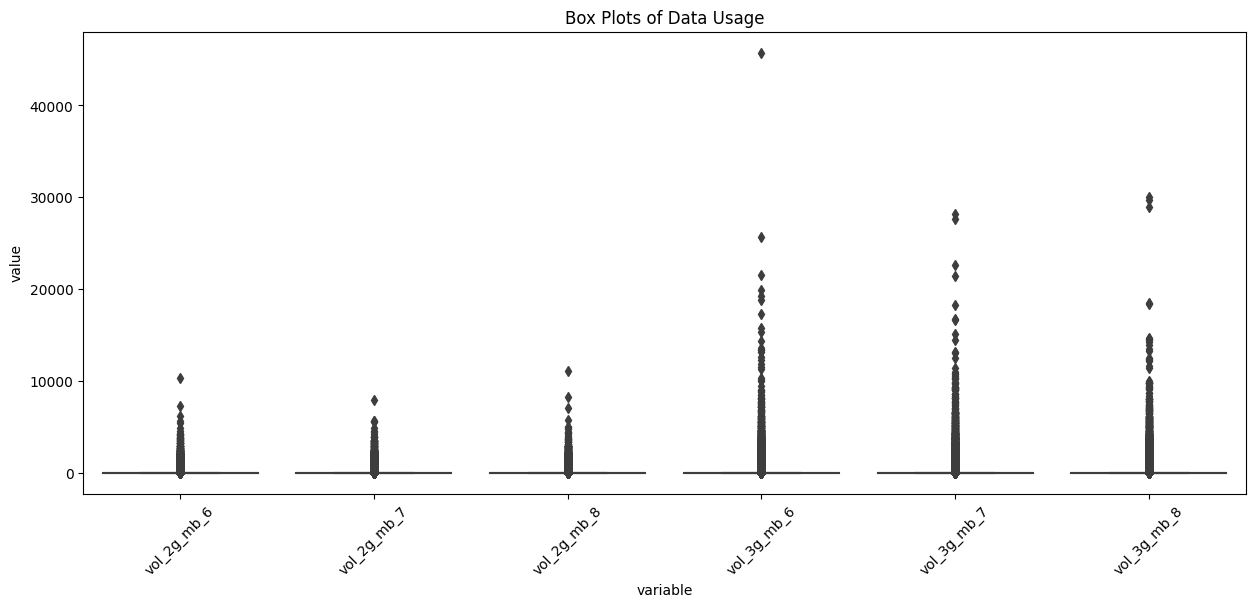

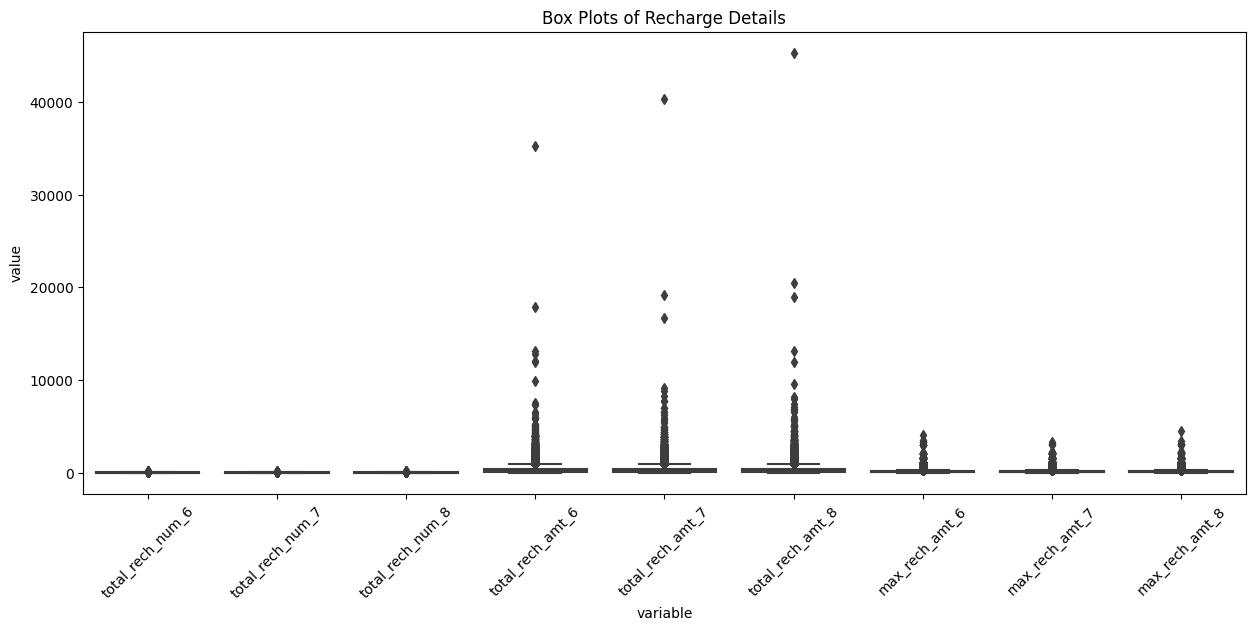

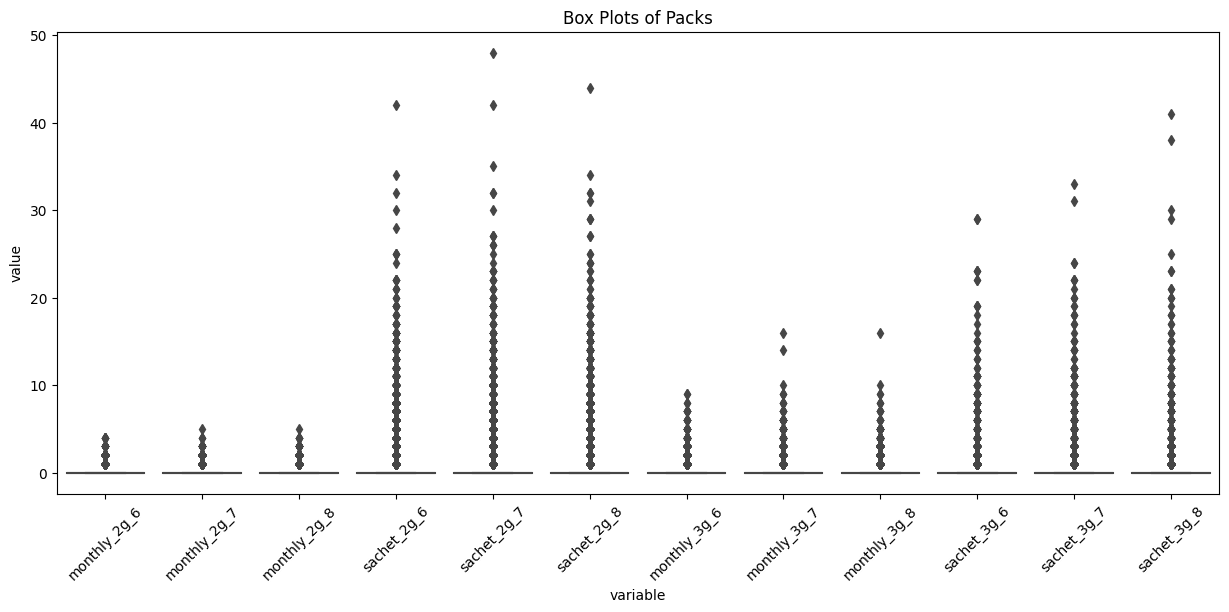

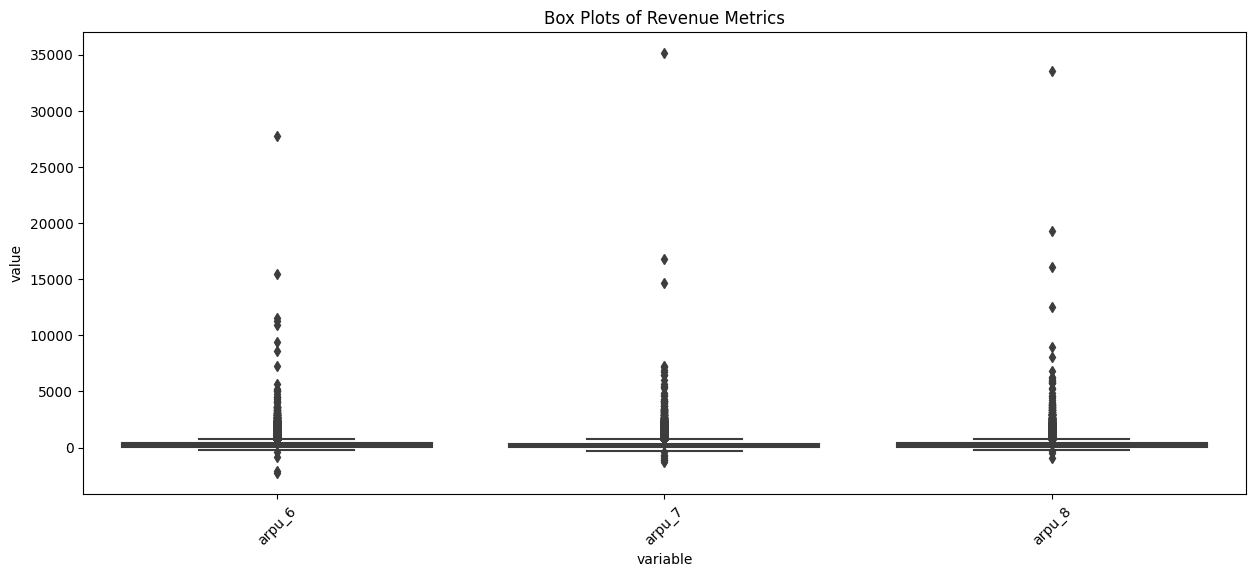

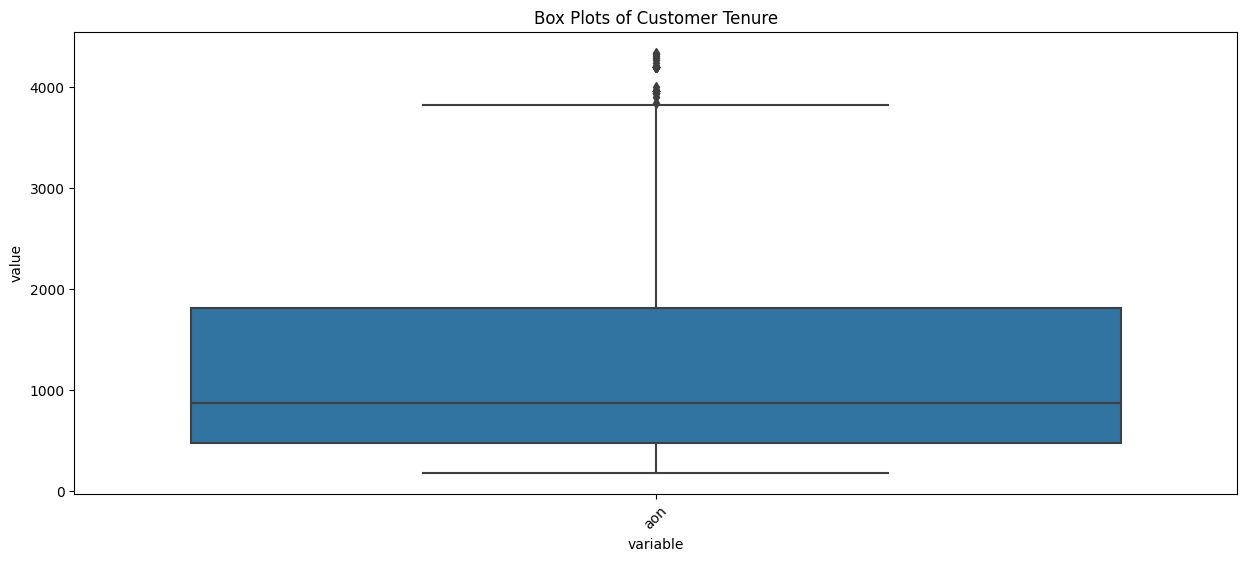

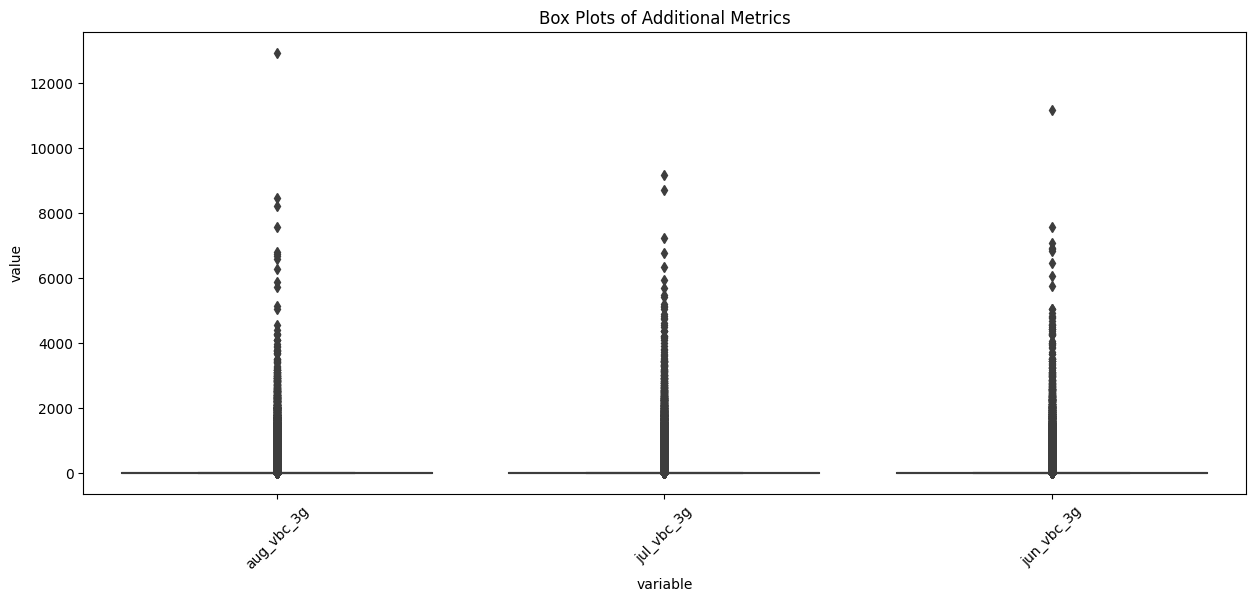

In [115]:
# Update each group to include only numeric columns
for group_name, features in features_groups.items():
    numeric_features = [col for col in features if pd.api.types.is_numeric_dtype(data[col])]
    features_groups[group_name] = numeric_features

# Melt the DataFrame for easier plotting with seaborn
melted_data = pd.melt(data, id_vars='churn_probability', value_vars=[col for group in features_groups.values() for col in group])

# Iterate through each group in features_groups
for group_name, features in features_groups.items():
    # Filter the melted DataFrame for the current group
    group_data = melted_data[melted_data['variable'].isin(features)]

    # Check if group_data is not empty
    if not group_data.empty:
        plt.figure(figsize=(15, 6))  # Adjust the size as needed
        sns.boxplot(x='variable', y='value', data=group_data)
        plt.xticks(rotation=45)  # Rotate feature names for readability
        plt.title(f'Box Plots of {group_name}')
        plt.show()


## Start data preprocessing

Start of create new features of different of recharge date

In [117]:
last_rech_group = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

data[last_rech_group].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
0           6/22/2014           7/10/2014           8/24/2014
1           6/12/2014           7/10/2014           8/26/2014
2           6/11/2014           7/22/2014           8/24/2014
3           6/15/2014           7/21/2014           8/25/2014
4           6/25/2014           7/26/2014           8/30/2014

In [118]:
for col in last_rech_group:
    data[col] = pd.to_datetime(data[col], errors='coerce')  

data['days_diff_rech_6'] = ( pd.to_datetime('6/30/2014')- data['date_of_last_rech_6']).dt.days
data['days_diff_rech_7'] = ( pd.to_datetime('7/31/2014') - data['date_of_last_rech_7']).dt.days
data['days_diff_rech_8'] = ( pd.to_datetime('8/31/2014') - data['date_of_last_rech_8']).dt.days

### drop the cols

In [139]:
# Iterate over each column and drop columns with only one unique value
cols_to_drop = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','id']

# Drop the identified columns
data.drop(cols_to_drop, axis=1, inplace=True)
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 128 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   

In [140]:
data.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  67231.000000  67312.000000   
mean     283.134365    278.185912    278.858826    133.153275    133.894438   
std      334.213918    344.366927    351.924315    299.963093    311.277193   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      7.410000      6.675000   
50%      197.484000    191.588000    192.234000     34.110000     32.280000   
75%      370.791000    365.369500    369.909000    119.390000    115.837500   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  66296.000000  67231.000000  67312.000000  66296.000000   67231.000000   
mean     132.978257    198.874771    197.153383    196.543577       9.765435   
std      311.896596    316.818355    322.482226    324.089234      57.374429   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        6.410000     34.860000     32.240000     31.575000       0.000000   
50%       32.100000     96.480000     91.885000     91.800000       0.000000   
75%      115.060000    232.990000    227.630000    229.345000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   67312.000000   66296.000000   67231.000000   67312.000000   
mean        7.014568       7.004892      14.186457       9.842191   
std        55.960985      53.408135      73.469261      58.511894   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   66296.000000      67231.000000      67312.000000      66296.000000   
mean        9.771783         46.904854         46.166503         45.686109   
std        64.618388        150.971758        154.739002        153.716880   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.660000          1.650000          1.610000   
50%         0.000000         11.910000         11.580000         11.740000   
75%         0.000000         40.740000         39.760000         39.895000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      67231.000000      67312.000000      66296.000000      67231.000000   
mean          93.238231         90.799240         91.121447          3.743179   
std          162.046699        153.852597        152.997805         13.319542   
min            0.000000          0.000000          0.000000          0.000000   
25%            9.920000         10.090000          9.830000          0.000000   
50%           41.030000         40.170000         40.350000          0.000000   
75%          110.430000        107.540000        109.245000          2.060000   
max         4696.830000       4557.140000       4961.330000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      67312.000000      66296.000000      67231.000000      67312.000000   
mean           3.777031          3.661652          1.126025          1.361052   
std           13.568110         13.009193          5.741811          7.914113   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

In [148]:
pd.set_option('display.max_rows', None) 

# Check for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values

std_ic_t2f_mou_8    3703
loc_og_t2t_mou_8    3703
std_og_t2m_mou_8    3703
std_og_mou_8        3703
std_og_t2t_mou_8    3703
isd_og_mou_8        3703
loc_og_mou_8        3703
std_ic_t2m_mou_8    3703
loc_og_t2c_mou_8    3703
spl_og_mou_8        3703
loc_og_t2f_mou_8    3703
loc_ic_mou_8        3703
loc_og_t2m_mou_8    3703
std_og_t2f_mou_8    3703
og_others_8         3703
std_ic_t2t_mou_8    3703
roam_og_mou_8       3703
ic_others_8         3703
roam_ic_mou_8       3703
std_ic_mou_8        3703
loc_ic_t2t_mou_8    3703
loc_ic_t2m_mou_8    3703
offnet_mou_8        3703
isd_ic_mou_8        3703
spl_ic_mou_8        3703
loc_ic_t2f_mou_8    3703
onnet_mou_8         3703
ic_others_6         2768
isd_og_mou_6        2768
std_og_mou_6        2768
spl_ic_mou_6        2768
spl_og_mou_6        2768
loc_ic_t2m_mou_6    2768
std_ic_t2t_mou_6    2768
og_others_6         2768
loc_ic_mou_6        2768
loc_ic_t2t_mou_6    2768
std_og_t2t_mou_6    2768
loc_ic_t2f_mou_6    2768
std_og_t2f_mou_6    2768


# Using pycarat framework to simply test the data modeling

In [180]:
# init setup
from pycaret.classification import *
clf1 = setup(data = data, 
             target = 'churn_probability',
             session_id = 42,
             preprocess = False,
             experiment_name = "first_checkmodel"
            )

In [181]:
%%time

best_model = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

CPU times: user 2min 16s, sys: 14.5 s, total: 2min 30s
Wall time: 5min 37s


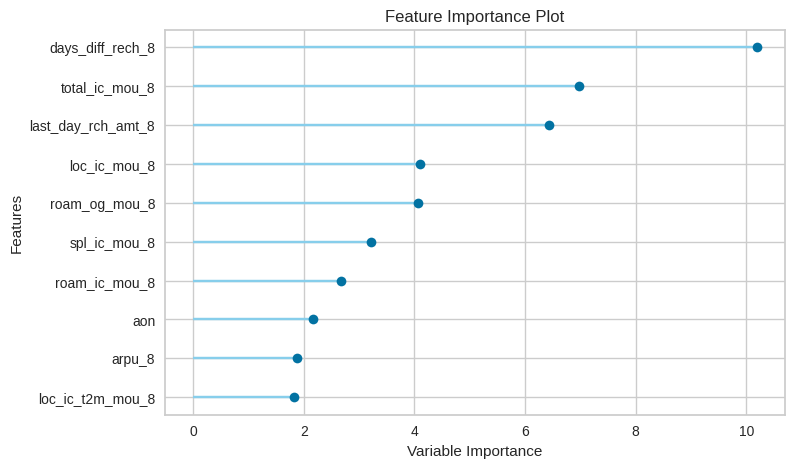

In [183]:
plot_model(best_model, plot='feature')

### Handle the missing values, Target Imbalance, Normalize, Remove Multicollinearity and Remove outliers to test again

In [184]:
from pycaret.classification import *
clf1 = setup(data = data, 
             target = 'churn_probability',
             session_id = 42,
             
             # fix imbalance
             fix_imbalance = True,
             
             # Normalize
             normalize = True,
             
             # remove multicollinearity
             remove_multicollinearity = True,
             
             # remove outliner
             remove_outliers = True,
             experiment_name = "Sec_checkmodel"
            )

In [ ]:
%%time

best_model = compare_models(
    include = select_model,
    sort = 'Accuracy')

\
                                                 
Initiated  . . . . . . . . . . . . . . . . . .   
Status     . . . . . . . . . . . . . . . . . .   
Estimator  . . . . . . . . . . . . . . . . . .   

                                            
                                            
Initiated                         08:23:26  
Status                    Fitting 10 Folds  
Estimator  Light Gradient Boosting Machine

Empty DataFrame
Columns: [Model, Accuracy, AUC, Recall, Prec., F1, Kappa, MCC, TT (Sec)]
Index: []

Processing:   0%|          | 0/37 [00:00<?, ?it/s]

In [178]:
from pycaret.classification import *
clf1 = setup(data = data, 
             target = 'churn_probability',
             session_id = 42,
             # # fix imbalance
             # fix_imbalance = True,
             # fix_imbalance_method = 'RandomUnderSampler',
             
             # Imputation
             imputation_type = 'iterative',
             
             # # Normalize
             # normalize = True,
             
             # remove multicollinearity
             remove_multicollinearity = True,
             multicollinearity_threshold = 0.95,
             
             # remove outliner
             remove_outliers = True,
             outliers_threshold = 0.1
             experiment_name = "third_checkmodel"
            )

In [179]:
%%time

select_model = ['lightgbm', 'xgboost', 'et', 'rf', 'gbc','ada', 'lr', 'dummy']
best_model = compare_models(
    include = select_model,
    sort = 'Accuracy')

Processing:   0%|          | 0/37 [00:00<?, ?it/s]

#  Creating submission file

In [174]:
unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

## Create new feature to unseen data

In [175]:
for col in last_rech_group:
    unseen[col] = pd.to_datetime(unseen[col], errors='coerce')  

unseen['days_diff_rech_6'] = ( pd.to_datetime('6/30/2014')- unseen['date_of_last_rech_6']).dt.days
unseen['days_diff_rech_7'] = ( pd.to_datetime('7/31/2014') - unseen['date_of_last_rech_7']).dt.days
unseen['days_diff_rech_8'] = ( pd.to_datetime('8/31/2014') - unseen['date_of_last_rech_8']).dt.days

In [176]:
pred_unseen = predict_model(best_model, data = unseen)

In [177]:
pred_unseen

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      69999        109             0.0             0.0             0.0   
1      70000        109             0.0             0.0             0.0   
2      70001        109             0.0             0.0             0.0   
3      70002        109             0.0             0.0             0.0   
4      70003        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
29995  99994        109             0.0             0.0             0.0   
29996  99995        109             0.0             0.0             0.0   
29997  99996        109             0.0             0.0             0.0   
29998  99997        109             0.0             0.0             0.0   
29999  99998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                6/30/2014            7/31/2014            8/31/2014   
1                6/30/2014            7/31/2014            8/31/2014   
2                6/30/2014            7/31/2014            8/31/2014   
3                6/30/2014            7/31/2014            8/31/2014   
4                6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
29995            6/30/2014            7/31/2014            8/31/2014   
29996            6/30/2014            7/31/2014            8/31/2014   
29997            6/30/2014            7/31/2014            8/31/2014   
29998            6/30/2014            7/31/2014            8/31/2014   
29999            6/30/2014            7/31/2014            8/31/2014   

            arpu_6      arpu_7  ...  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  \
0        91.882004   65.330002  ...        NaN  1692    0.000000    0.000000   
1       414.167999  515.567993  ...        NaN  2533    0.000000    0.000000   
2       329.843994  434.884003  ...        NaN   277  525.609985  758.409973   
3        43.549999  171.389999  ...        NaN  1244    0.000000    0.000000   
4       306.854004  406.289001  ...        NaN   462    0.000000    0.000000   
...            ...         ...  ...        ...   ...         ...         ...   
29995   718.869995  396.259003  ...        NaN  1255    3.710000  105.639999   
29996   218.326996  324.070007  ...        NaN  2258    0.000000    0.000000   
29997   139.473007   38.230000  ...        NaN   440    0.000000    0.000000   
29998  1122.911987  781.120972  ...        NaN   810    0.000000    0.000000   
29999   318.980011  307.890015  ...        1.0   440  762.549988  687.130005   

       jun_vbc_3g  days_diff_rech_6  days_diff_rech_7  days_diff_rech_8  \
0        0.000000               9.0               5.0               7.0   
1        0.000000              11.0              15.0               7.0   
2      241.839996               1.0               4.0               3.0   
3        0.000000               5.0               1.0               7.0   
4        0.000000               1.0               2.0               1.0   
...           ...               ...               ...               ...   
29995   61.480000               3.0               4.0               2.0   
29996    0.000000              12.0               7.0               2.0   
29997    0.000000               8.0              21.0               1.0   
29998    0.000000               0.0              13.0               0.0   
29999   22.760000               2.0               3.0               4.0   

       prediction_label  prediction_score  
0                     0            0.9935  
1                     0            0.9915  
2                     1            0.8541  
3                     0            0.9819  
4                     0            0.9973  
...                 ...               ...  
29995                 0            0.9975  
29996                 0       